In [1]:
import datetime

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yfin
from scipy import stats


yfin.pdr_override()

# Money at a fixed rate for an unsecured purchase.

### We use the German Credit Risk dataset from Kaggle (https://www.kaggle.com/datasets/uciml/german-credit). First, we need download and place the data in the working directory.





In [2]:
# Assuming the file is named 'german_credit_data.csv' and is located in the current directory
file_path = r'Data\german_credit_data_target.csv'

# Load the dataset
credit_data = pd.read_csv(file_path)

# Drop the ID column
credit_data.drop(columns=['Unnamed: 0'], inplace=True)

# Display the first few rows of the dataset
print(credit_data.head())

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


In [3]:
# Basic information about the dataset
print("Basic Information:")
print(credit_data.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB
None


In [4]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(credit_data.describe())


Summary Statistics for Numerical Columns:
               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


In [5]:
# Check for missing values
print(credit_data.isnull().sum())

# Handle missing values, for example, by filling them with a placeholder
# Here, filling missing values with 'unknown' for categorical columns
credit_data.fillna('unknown', inplace=True)

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2136\861203629.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(credit_data.corr(), annot=True, fmt=".2f")


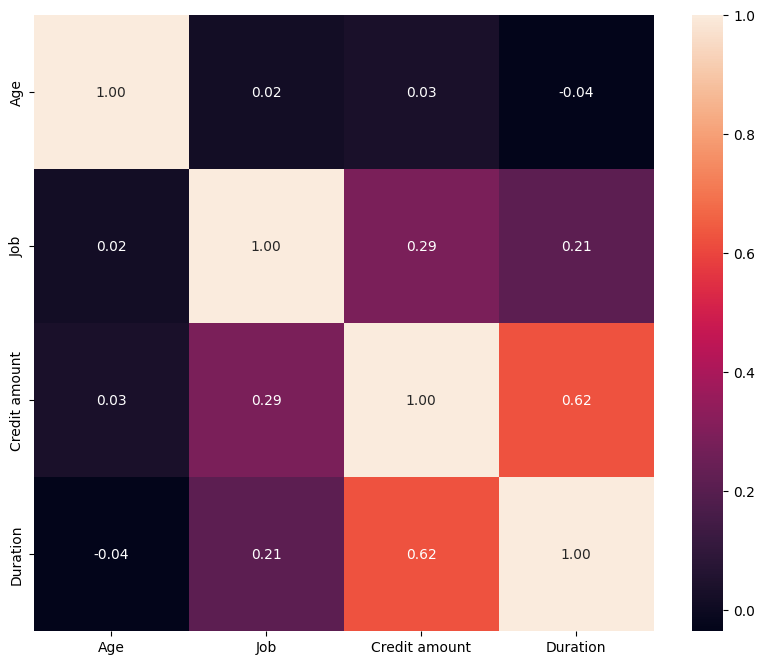

In [6]:
# Plotting a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(credit_data.corr(), annot=True, fmt=".2f")
plt.show()

There is a moderately positive correlation (0.62) between the credit amount and the duration of the credit. This suggests that higher credit amounts are typically associated with longer repayment periods, which is intuitive as larger loans often require more time to repay.

The correlation between job level and credit amount is very weak (0.29), suggesting that the job level of an individual has a minimal direct influence on the amount of credit granted. This may imply that other factors, such as credit history or income, play a more significant role in determining credit amounts.

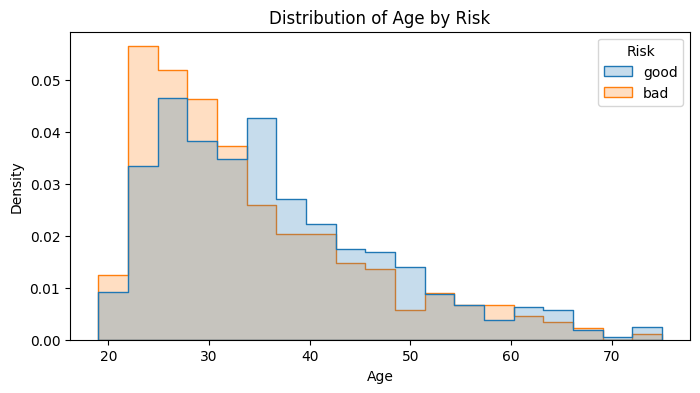

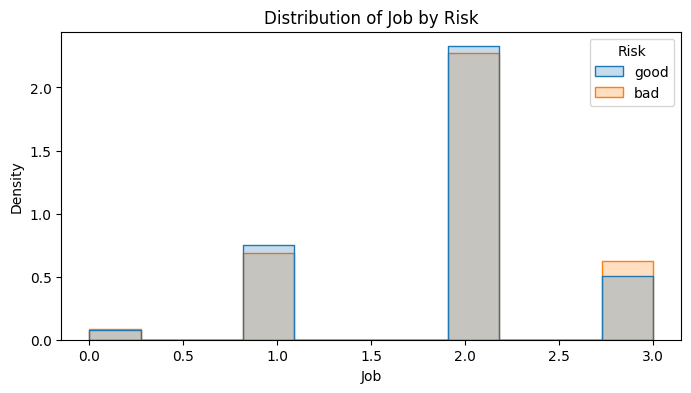

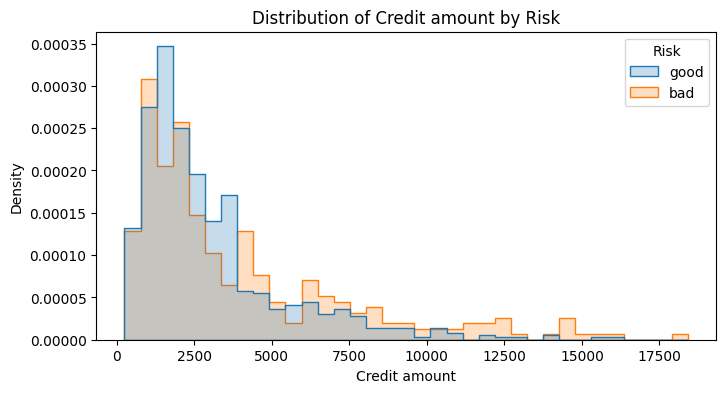

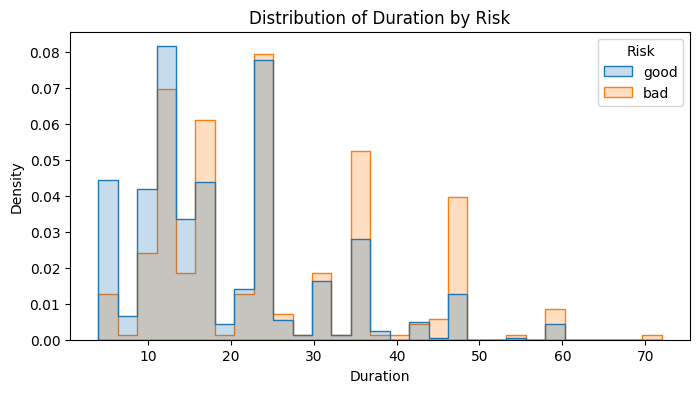

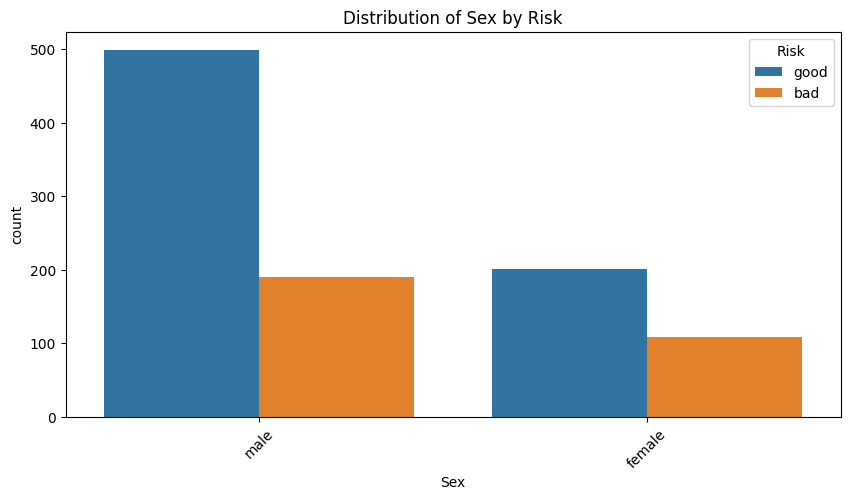

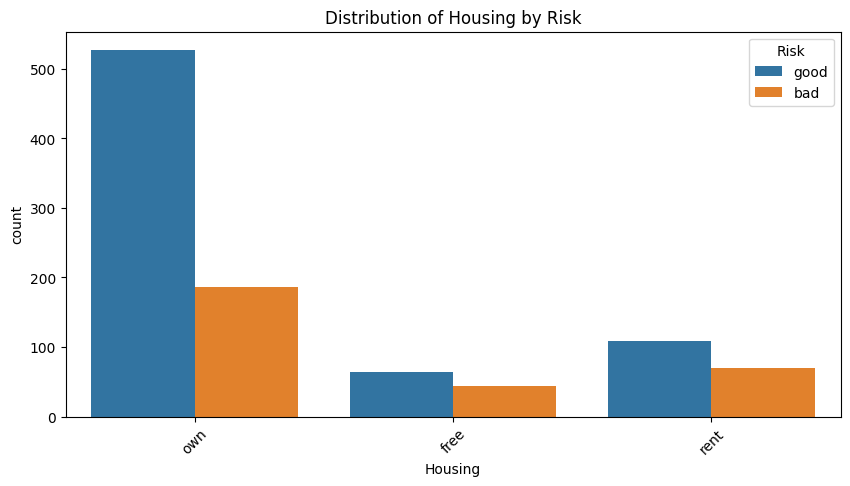

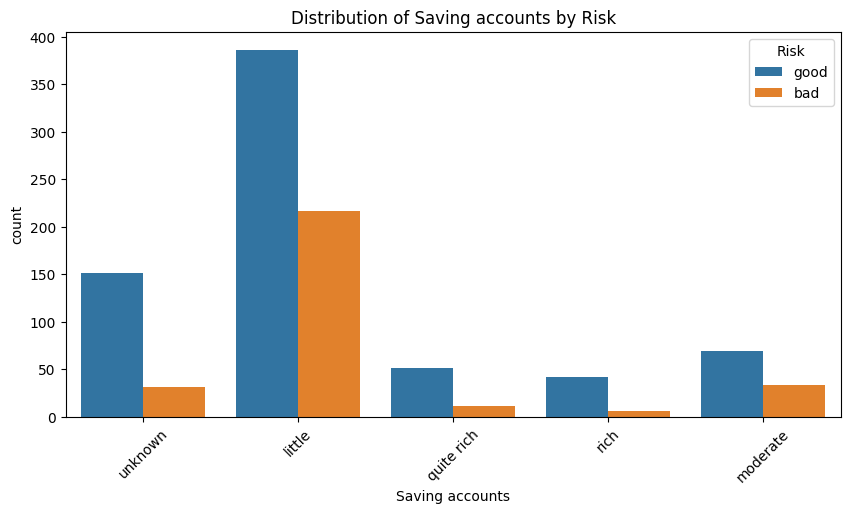

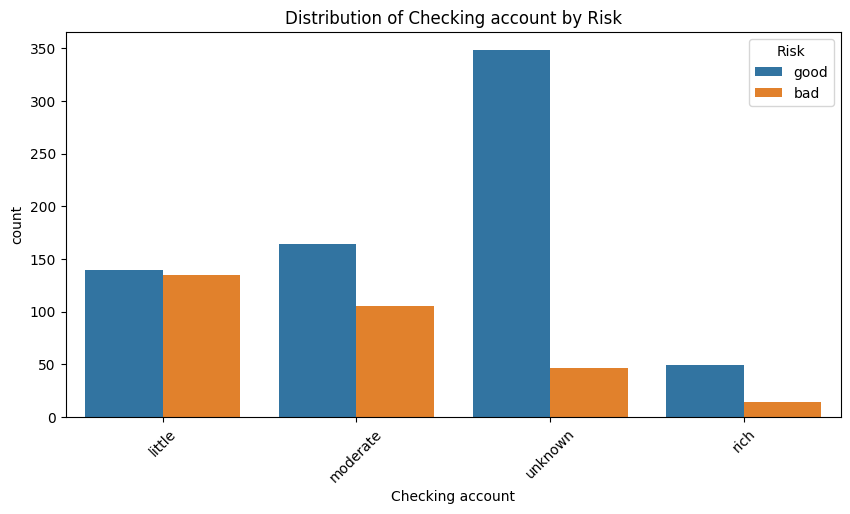

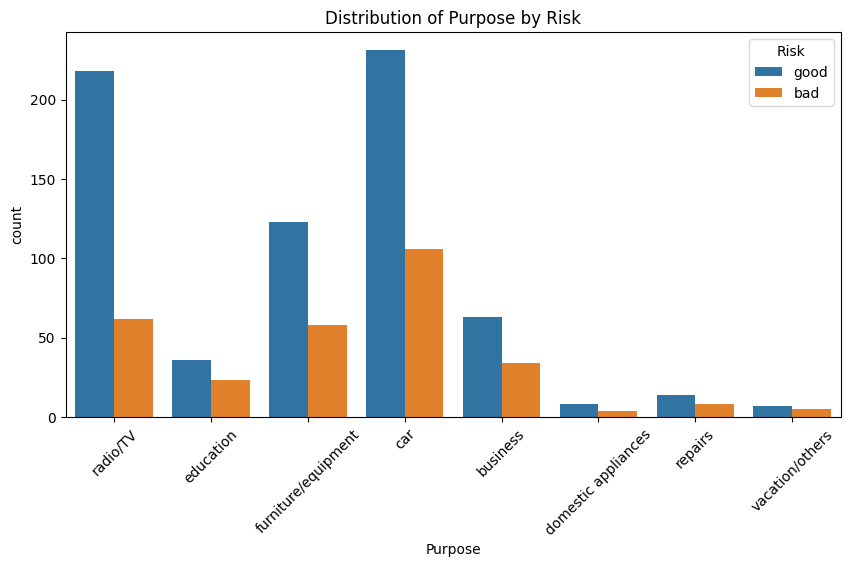

In [7]:
# Plotting histograms for numeric features with respect to Risk
numeric_features = ['Age', 'Job', 'Credit amount', 'Duration']
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(credit_data, x=feature, hue='Risk', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by Risk')
    plt.show()

# Analysis of categorical features with respect to Risk
categorical_features = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Risk', data=credit_data)
    plt.title(f'Distribution of {feature} by Risk')
    plt.xticks(rotation=45)
    plt.show()

Above figures allows to see which factors affects the outcome the most. Details will be discussed in the report.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoders = {}
for column in credit_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    credit_data[column] = label_encoders[column].fit_transform(credit_data[column])

# Splitting the data into features and target
X = credit_data.drop('Risk', axis=1)
y = credit_data['Risk']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Training the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting on test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.40      0.48        91
           1       0.77      0.89      0.82       209

    accuracy                           0.74       300
   macro avg       0.69      0.64      0.65       300
weighted avg       0.72      0.74      0.72       300



In [10]:
import numpy as np

# Getting feature importances
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature Credit amount (0.2429102833603888)
2. feature Age (0.18828154657398738)
3. feature Duration (0.1528232232069147)
4. feature Checking account (0.12797838806562198)
5. feature Purpose (0.08835438016216911)
6. feature Saving accounts (0.06685597568658981)
7. feature Job (0.05937968765275512)
8. feature Housing (0.043698702816807614)
9. feature Sex (0.02971781247476549)


# Money at a floating rate for a secured purchase.

### Beyond the personal credit data, the market data is also important when lending with collateral. In this part, we analyze the property market data. In this task, we assume we are a Singapore bank lending out for resale HDB flat purchase. We use data from the HDB Resale Price Index (which is normalized by location and etc.) to reflec percentage price change. See https://www.tech.gov.sg/products-and-services/data-gov-sg/

In [11]:
hdb_file = r"Data\HousingAndDevelopmentBoardResalePriceIndex1Q2009100Quarterly.csv"
hdb_data = pd.read_csv(hdb_file)

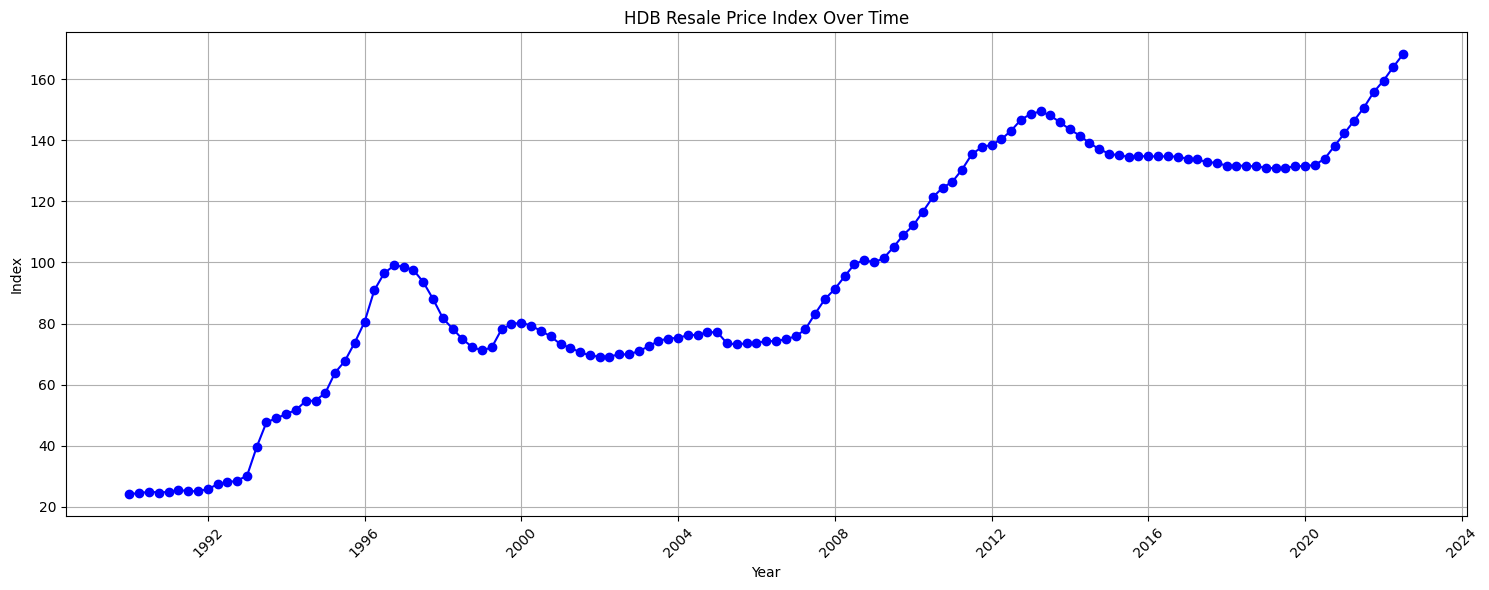

In [12]:
# Convert 'quarter' to datetime for better handling
def convert_quarter_to_date(quarter_str):
    year, quarter = quarter_str.split('-')
    month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}.get(quarter, '01')
    return f"{year}-{month}-01"

hdb_data['quarter'] = pd.to_datetime(hdb_data['quarter'].apply(convert_quarter_to_date))

# Replotting
plt.figure(figsize=(15, 6))
plt.plot(hdb_data['quarter'], hdb_data['index'], marker='o', linestyle='-', color='b')
plt.title('HDB Resale Price Index Over Time')
plt.xlabel('Year')
plt.ylabel('Index')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


We see a general upward trends with some downturns in the visualization above.

In [13]:
# Calculating the percentage change over quarters
hdb_data['percent_change'] = hdb_data['index'].pct_change() * 100

# Displaying the first few rows with percentage change
hdb_data.head()

# Calculating market volatility metrics
# Standard deviation of percentage change (a common measure of volatility)
mean_change = hdb_data['percent_change'].mean()
std_dev_change = hdb_data['percent_change'].std()

# Displaying the calculated metrics
mean_change, std_dev_change

(1.5839324830676489, 4.342077929643165)

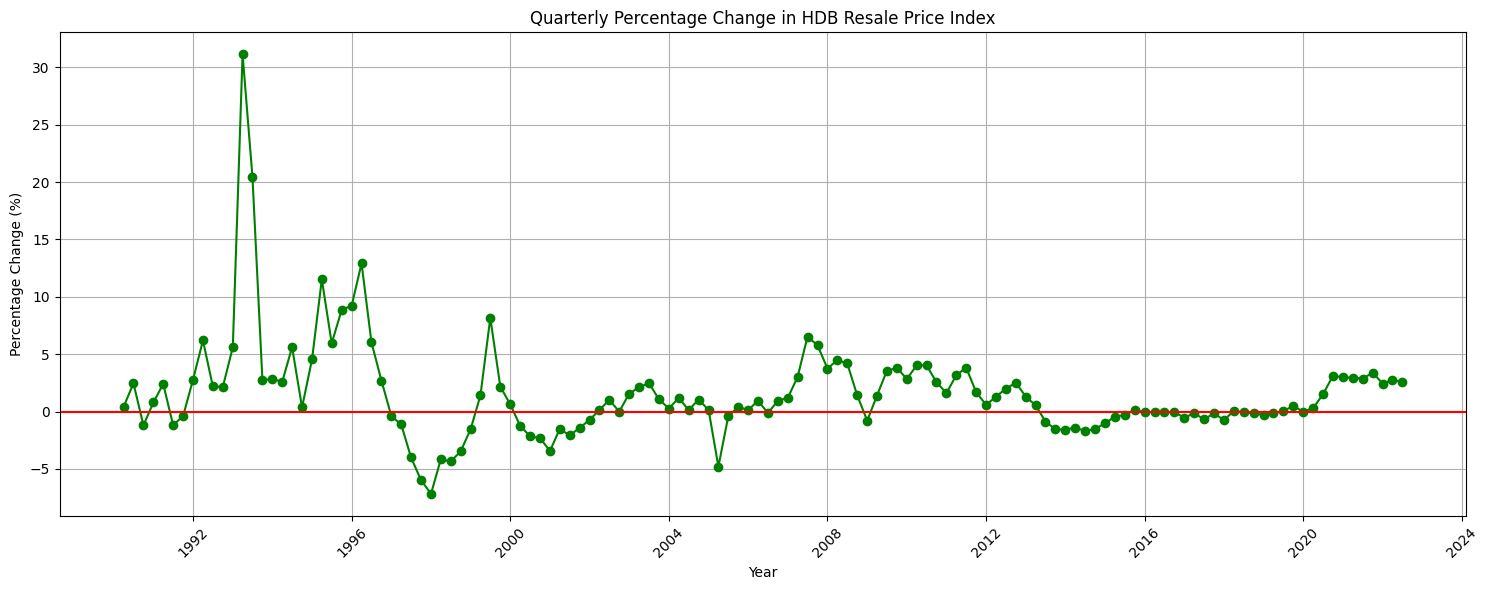

In [14]:
# Plotting the percentage change (return) over time
plt.figure(figsize=(15, 6))
plt.plot(hdb_data['quarter'], hdb_data['percent_change'], marker='o', linestyle='-', color='g')
plt.title('Quarterly Percentage Change in HDB Resale Price Index')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='-')  # Adding a line at 0% change for reference
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
# For a 30-year period, which is 120 quarters, we need to adjust the standard deviation
# The standard deviation over multiple periods is the standard deviation of one period
# multiplied by the square root of the number of periods

# Number of periods (quarters) in 30 years
num_periods = 120

# Adjusted standard deviation for 30 years
adjusted_std_dev = std_dev_change * (num_periods ** 0.5)

# Calculating the 95% confidence interval for 30 years
ci_lower_30_years = mean_change * num_periods - 1.96 * adjusted_std_dev
ci_upper_30_years = mean_change * num_periods + 1.96 * adjusted_std_dev

ci_lower_30_years, ci_upper_30_years

(96.84434005049093, 283.2994558857448)

# Money at a fixed rate for a business for a construction loan.

In [16]:
#To analyze Money at a fixed rate for a business for a construction loan I have used 5 years of WellTower data using yahoo finance and economics data as my data source

In [17]:
# Load the dataset
df_well = pd.read_csv(r"Data\Scenerio_3.csv")

# Display the first few rows of the dataset
df_well.head()

,Date,Total Construction Spending,All Employees,Average Hourly Earnings of All Employees,Producer Price Index by Construction Materials,Interest rate,Loans Secured by Real Estate,Stock price
0,1/1/2019,1296049,7424,30.32,238.5,2.40,353984.699,57.805672
1,2/1/2019,1312040,7396,30.42,238.1,2.40,NaN,63.552090
2,3/1/2019,1322532,7422,30.53,238.1,2.41,NaN,62.352749
3,4/1/2019,1353657,7459,30.64,237.2,2.42,357312.746,64.922333
4,5/1/2019,1364421,7486,30.70,237.3,2.39,NaN,63.077301


In [18]:
df_well.describe()

,Total Construction Spending,All Employees,Average Hourly Earnings of All Employees,Producer Price Index by Construction Materials,Interest rate,Loans Secured by Real Estate,Stock price
count,5.900000e+01,59.000000,59.000000,59.000000,59.000000,19.000000,59.000000
mean,1.665694e+06,7572.000000,33.230678,289.701203,1.805593,408681.082579,69.292731
std,2.169382e+05,281.865583,2.092600,47.033501,1.874228,46444.917103,12.221940
min,1.296049e+06,6527.000000,30.320000,232.200000,0.050000,353984.699000,35.661427
25%,1.468693e+06,7403.000000,31.400000,237.250000,0.090000,375461.859500,62.666167
50%,1.639779e+06,7545.000000,32.820000,313.083000,1.550000,393526.249000,71.316750
75%,1.859450e+06,7789.000000,34.980000,333.576000,2.490000,438319.020000,78.164929
max,2.050058e+06,8039.000000,37.200000,353.015000,5.330000,497084.978000,92.685661


<Axes: title={'center': 'Total construction spending'}, xlabel='Date', ylabel='Million of USD'>

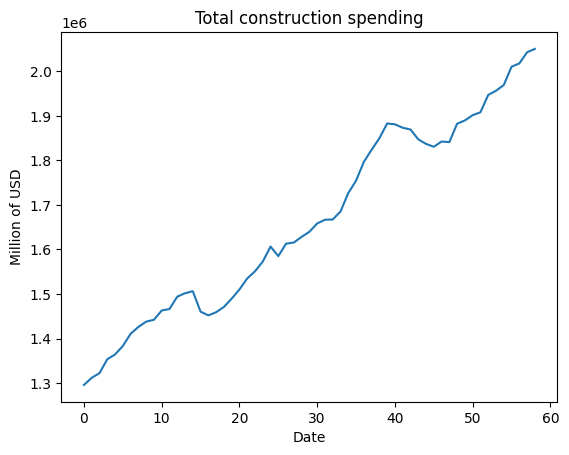

In [19]:
#Charting economics and industry metrics
df_well["Total Construction Spending"].plot(title="Total construction spending", xlabel='Date', ylabel='Million of USD')

<Axes: title={'center': 'Interest rate'}, xlabel='Date', ylabel='Percentage'>

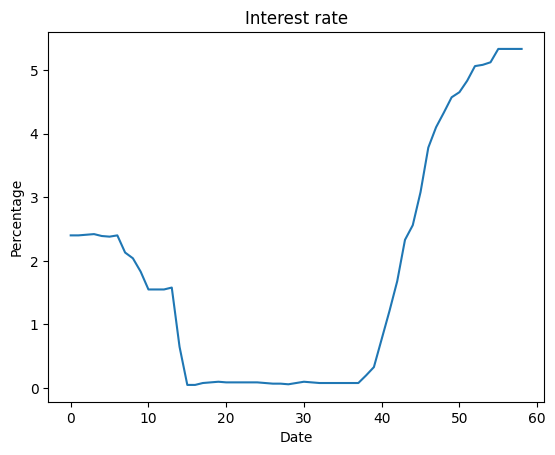

In [20]:
df_well["Interest rate"].plot(title="Interest rate", xlabel='Date', ylabel='Percentage')

<Axes: title={'center': 'All Employees'}, xlabel='Date', ylabel='Number of people'>

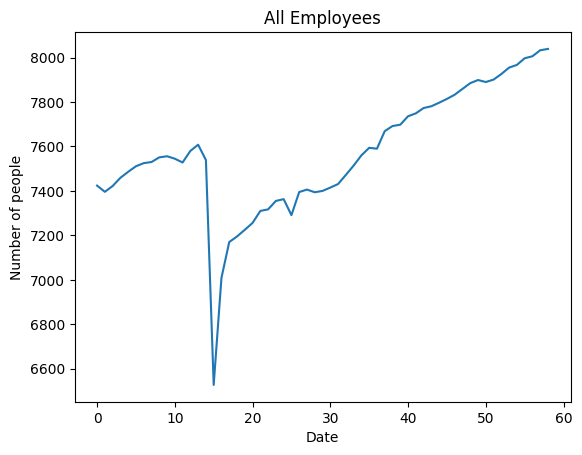

In [21]:
df_well["All Employees"].plot(title="All Employees", xlabel='Date', ylabel='Number of people')

<Axes: title={'center': 'Average Hourly Earnings of All Employees'}, xlabel='Date', ylabel='USD'>

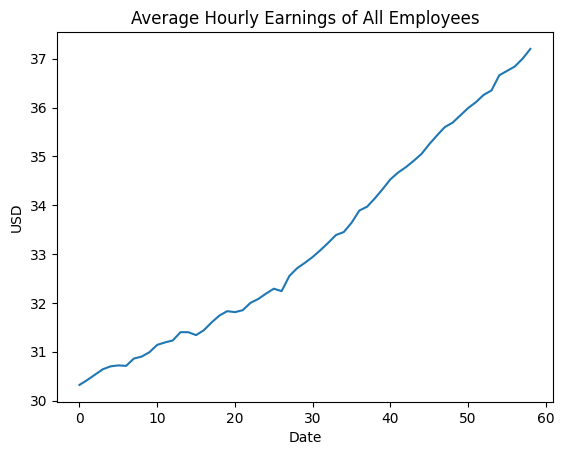

In [22]:
df_well["Average Hourly Earnings of All Employees"].plot(title="Average Hourly Earnings of All Employees", xlabel='Date', ylabel='USD')

<Axes: title={'center': 'Producer Price Index by Construction Materials'}, xlabel='Date', ylabel='Price Index'>

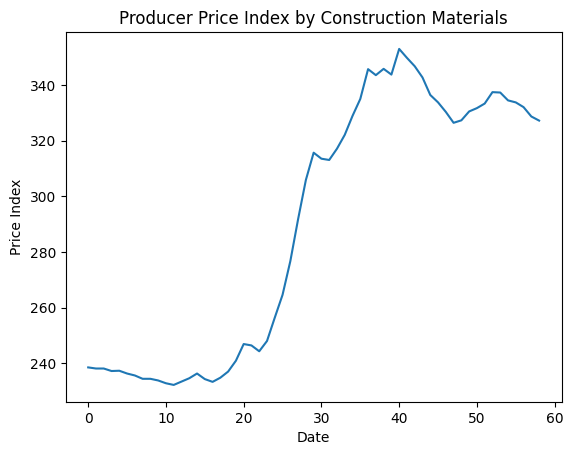

In [23]:
df_well["Producer Price Index by Construction Materials"].plot(title="Producer Price Index by Construction Materials", xlabel='Date', ylabel='Price Index')

<Axes: title={'center': 'Stock price '}, xlabel='Date', ylabel='USD'>

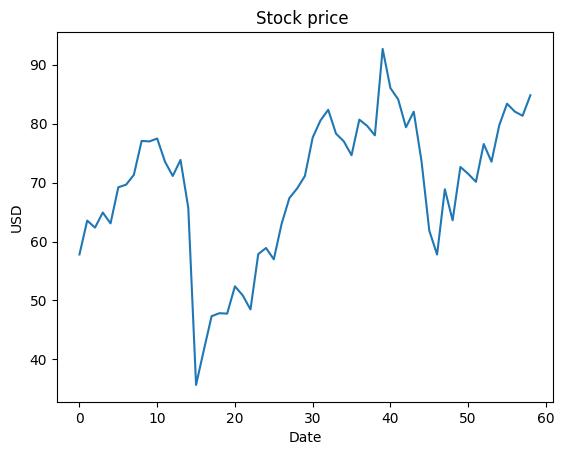

In [24]:
df_well["Stock price "].plot(title="Stock price ", xlabel='Date', ylabel='USD')

In [25]:
# Create a new DataFrame with relevant columns for correlation analysis
correlation_df_well = df_well[['Total Construction Spending',	'All Employees',	'Average Hourly Earnings of All Employees',	'Producer Price Index by Construction Materials',	'Interest rate',	'Loans Secured by Real Estate',	'Stock price ']]
correlation_matrix = correlation_df_well.corr()
correlation_matrix

,Total Construction Spending,All Employees,Average Hourly Earnings of All Employees,Producer Price Index by Construction Materials,Interest rate,Loans Secured by Real Estate,Stock price
Total Construction Spending,1.000000,0.764239,0.981062,0.915350,0.509093,0.934618,0.562920
All Employees,0.764239,1.000000,0.783897,0.681477,0.764367,0.654550,0.719459
Average Hourly Earnings of All Employees,0.981062,0.783897,1.000000,0.879501,0.627082,0.985315,0.489235
Producer Price Index by Construction Materials,0.915350,0.681477,0.879501,1.000000,0.323758,0.826115,0.628616
Interest rate,0.509093,0.764367,0.627082,0.323758,1.000000,0.599052,0.304177
Loans Secured by Real Estate,0.934618,0.654550,0.985315,0.826115,0.599052,1.000000,0.301036
Stock price,0.562920,0.719459,0.489235,0.628616,0.304177,0.301036,1.000000


# Publicly traded Equity (e.g. common stock) – that is, securities lending of a stock.

## NVIDIA Stock Analysis

In [26]:
#To analyze a publicly traded stock I have used 5 years of NVIDIA data using yahoo finance as my data source

In [27]:
#Downloading the data using yahoo Finance

start = datetime.date(2019, 1, 1)
end = datetime.date(2023, 12, 31)
df = web.DataReader(["NVDA"], start, end)

[*********************100%%**********************]  1 of 1 completed


In [28]:
df_VIXN = web.DataReader(["^VIX"], start, end)["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


In [29]:
#Merging the VIX index data with our NVDIA dataset
df = df.merge(df_VIXN, on="Date", how="outer")
df.rename(columns={'Adj Close_y': 'VIX index'}, inplace=True)
df.describe()

,Open,High,Low,Close,Adj Close_x,Volume,VIX index
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,177.352243,180.632174,173.983038,177.463569,177.238880,4.626251e+07,21.367917
std,124.757333,126.716487,122.525187,124.675773,124.722888,1.998936e+07,8.238798
min,32.660000,33.790001,31.922501,31.997499,31.748953,9.788400e+06,11.540000
25%,69.150000,70.550625,67.028126,68.320625,68.064859,3.246800e+07,15.960000
50%,145.784996,148.631248,142.300003,145.820000,145.548157,4.319750e+07,19.525001
75%,231.895000,236.667503,225.437496,230.927502,230.648731,5.645790e+07,24.799999
max,502.160004,505.480011,494.119995,504.089996,504.045685,2.511528e+08,82.690002


In [30]:
#Viewing the data
df.head()

,Open,High,Low,Close,Adj Close_x,Volume,VIX index
Date,,,,,,,
2019-01-02,32.660000,34.619999,32.512501,34.055000,33.790470,50875200,23.219999
2019-01-03,33.447498,33.790001,31.922501,31.997499,31.748953,70555200,25.450001
2019-01-04,32.735001,34.432499,32.424999,34.047501,33.783035,58562000,21.379999
2019-01-07,34.625000,36.222500,34.107498,35.849998,35.571537,70916000,21.400000
2019-01-08,36.672501,36.695000,34.224998,34.957500,34.685963,78601600,20.469999


In [31]:
#stats Summary of our data
df.describe()

,Open,High,Low,Close,Adj Close_x,Volume,VIX index
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,177.352243,180.632174,173.983038,177.463569,177.238880,4.626251e+07,21.367917
std,124.757333,126.716487,122.525187,124.675773,124.722888,1.998936e+07,8.238798
min,32.660000,33.790001,31.922501,31.997499,31.748953,9.788400e+06,11.540000
25%,69.150000,70.550625,67.028126,68.320625,68.064859,3.246800e+07,15.960000
50%,145.784996,148.631248,142.300003,145.820000,145.548157,4.319750e+07,19.525001
75%,231.895000,236.667503,225.437496,230.927502,230.648731,5.645790e+07,24.799999
max,502.160004,505.480011,494.119995,504.089996,504.045685,2.511528e+08,82.690002


### Time Series Analysis

<Axes: title={'center': "NVIDIA's stock price"}, xlabel='Date'>

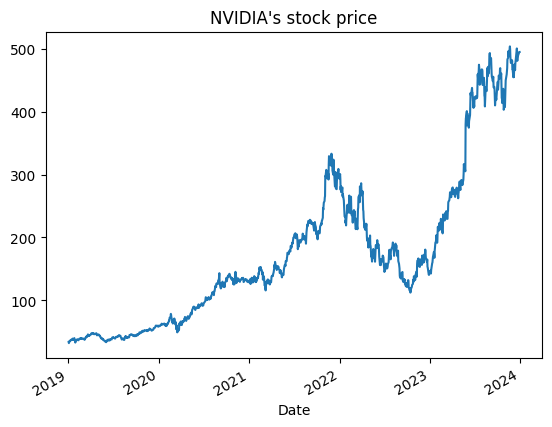

In [32]:
#Plotting the time series data
df['Adj Close_x'].plot(title="NVIDIA's stock price")

Time Series data from 2019-2023 of NVDIA stock

In [33]:
# Importing Plotply for Plotting
import plotly.graph_objects as go
from datetime import datetime

In [34]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close_x', 'Volume', 'VIX index'], dtype='object')

In [35]:
# Plotting stokck price data in candlestick pattern
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

CandleStick Pattern oF NVDIA stock data

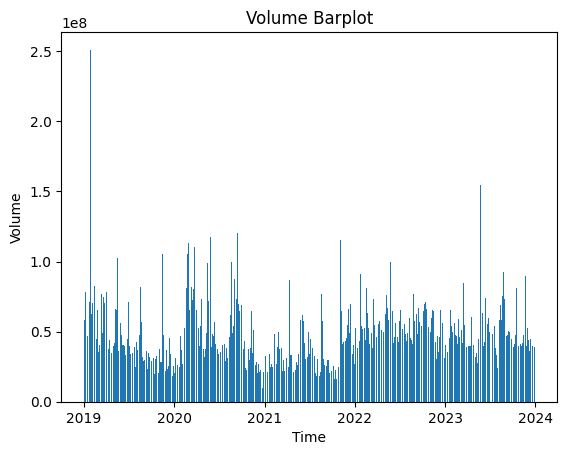

In [36]:
# Yearly volume Bar grph plot
plt.bar(df.index, df['Volume'], width=1.5)
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Volume Barplot')
plt.show()

Here you can see Volume traded in NVDIA stock each year

### Distribution Analysis

In [37]:
# Calculating Daily Returns
df['Daily_Return'] = df['Adj Close_x'].pct_change()

In [38]:
#Log returns
df['log_Return'] = np.log(df['Adj Close_x']) - np.log(df['Adj Close_x'].shift(1))

In [39]:
Max1 = df["log_Return"].max()
Min1 = df["log_Return"].min()
Max2 = (df["log_Return"].min() - df["log_Return"].mean()) / df["log_Return"].std()
Min2 = (df["log_Return"].max() - df["log_Return"].mean()) / df["log_Return"].std()
print("Over the last 5 years, NVDIA has had a maximum daily return of %.2f and a minimum daily return of %.2f If we use the formula to determine standard deviations from the mean, we get %.2f and %.2f standard deviations away from the mean for the minimum and maximum, respectively"%(Max1, Min1, Max2, Min2))

Over the last 5 years, NVDIA has had a maximum daily return of 0.22 and a minimum daily return of -0.20 If we use the formula to determine standard deviations from the mean, we get -6.35 and 6.66 standard deviations away from the mean for the minimum and maximum, respectively


In [40]:
df.log_Return

Date
2019-01-02         NaN
2019-01-03   -0.062319
2019-01-04    0.062099
2019-01-07    0.051587
2019-01-08   -0.025211
                ...   
2023-12-22   -0.003271
2023-12-26    0.009153
2023-12-27    0.002796
2023-12-28    0.002122
2023-12-29    0.000000
Name: log_Return, Length: 1258, dtype: float64

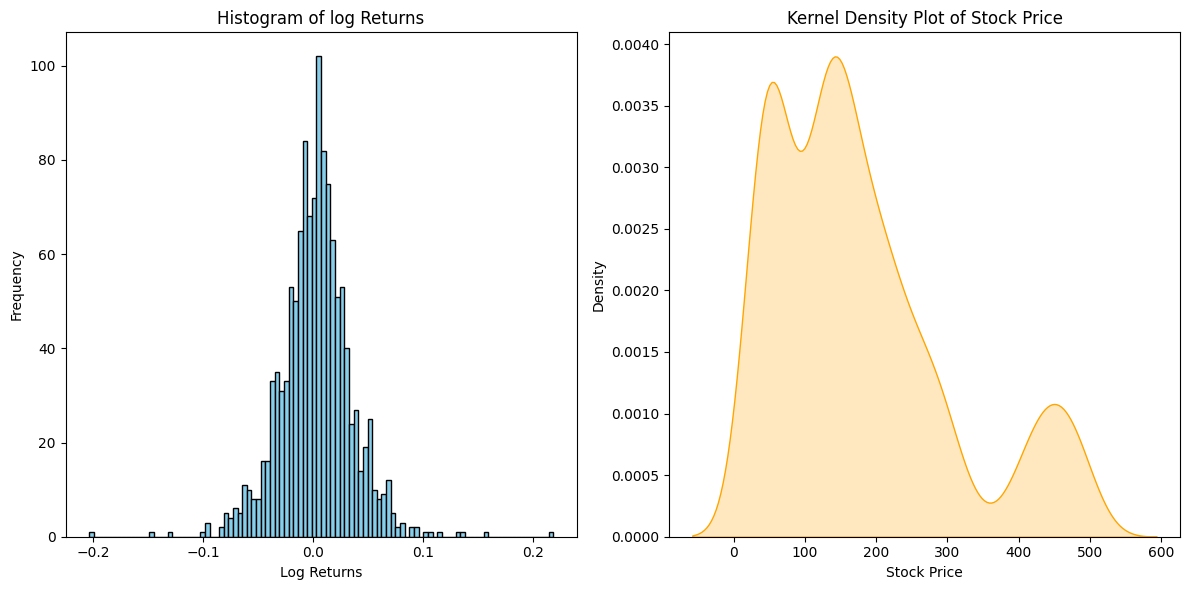

In [41]:
# Plot Histogram of Daily Returns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['log_Return'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')

# Plot Kernel Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['Adj Close_x'], fill=True, color='orange')
plt.title('Kernel Density Plot of Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

Here we can see the log returns of NVDIA price in a normal distribution, we will learn more about the distribution in further section.
Also with that we have kernel density plot of NVDIA price where we can see the price is more dence between 0-300 price range.

### Statsical anlysis

In [42]:
df['Adj Close_x']

Date
2019-01-02     33.790470
2019-01-03     31.748953
2019-01-04     33.783035
2019-01-07     35.571537
2019-01-08     34.685963
                 ...    
2023-12-22    488.299988
2023-12-26    492.790009
2023-12-27    494.170013
2023-12-28    495.220001
2023-12-29    495.220001
Name: Adj Close_x, Length: 1258, dtype: float64

In [43]:
# Defining the log return into another data frame for ease of writing code.
df_stats = np.log(df['Adj Close_x']) - np.log(df['Adj Close_x'].shift(1))
df_stats

Date
2019-01-02         NaN
2019-01-03   -0.062319
2019-01-04    0.062099
2019-01-07    0.051587
2019-01-08   -0.025211
                ...   
2023-12-22   -0.003271
2023-12-26    0.009153
2023-12-27    0.002796
2023-12-28    0.002122
2023-12-29    0.000000
Name: Adj Close_x, Length: 1258, dtype: float64

In [44]:
df_stats.describe()

count    1257.000000
mean        0.002136
std         0.032449
min        -0.203980
25%        -0.015274
50%         0.003049
75%         0.019616
max         0.218088
Name: Adj Close_x, dtype: float64

In [45]:
#Symmetric Test
(len(df[df_stats > df_stats.mean()])) / (len(df))

0.5151033386327504

We're getting about 51.5% of data points being greater than the mean, which shows we have a slightly negative skew to this dataset. We can't rule out symmetric returns based on this since it is only a sample of data and is reasonably close to the 50% mark. This makes it hard to say for certain whether NVDA returns are symmetric or not, but it is still a reasonable assumption to make here.

In [46]:
  ##Normality Test
stats.normaltest(np.array(df["log_Return"].dropna()))

NormaltestResult(statistic=123.17427198544009, pvalue=1.7907983358721418e-27)

We can use the `normaltest()` method here to determine if the sample data could fit a normal distribution. This method uses D'Agostino and Pearson's normality test, which combines skew and kurtosis to produce an omnibus test of normality.

The null hypothesis of this test is that the sample data fits a normal distribution. Let's assume we want to be 90% confident this data fits a normal distribution. We can compare this to the p-value to see if it's greater than 90%. In this case, the value, 1.79e-27, is extremely small, which leads us to reject the null hypothesis that this data fits a normal distribution.

In [47]:
  ##Skewness and Kurtosis
stats.jarque_bera((np.array(df["log_Return"].dropna())))

SignificanceResult(statistic=857.3019809304545, pvalue=6.906216338613697e-187)

The Jarque-Bera test was conducted on the log returns data. The test resulted in a statistic of 857.2981128421397 and an extremely low p-value of 6.919586190747671e-187. This indicates strong evidence against the null hypothesis that the data follows a normal distribution. Therefore, the log returns data is found to be significantly non-normally distributed based on the results of the Jarque-Bera test.

In [48]:
df_stats.min()

-0.20397965117133232

In [49]:
df_stats.max()

0.2180878060373761

In [50]:
dfMax = df_stats.max()
dfMin = df_stats.min()
print(
    "Min return of sample data is %.4f and the maximum return of sample data is %.4f"
    % (dfMin, dfMax)
)

Min return of sample data is -0.2040 and the maximum return of sample data is 0.2181


In [51]:
(dfMin - df_stats.mean()) / df_stats.std()

-6.351967005370254

In [52]:
(dfMax - df_stats.mean()) / df_stats.std()

6.6550990702779025

Over the last 5 years, NVDA has had a maximum daily return of 20.40% and a minimum daily return of -21.80%. If we use the formula to determine standard deviations from the mean, we get -6.35 and 6.65 standard deviations away from the mean for the minimum and maximum, respectively. These standard deviations are humongous when compared to the normal distribution. We can see this analytically when we plug in the z score to the `norm.cdf()` method to determine the probability this value could be in a normal distribution:

In [53]:
stats.norm.cdf(-6.35)

1.0765746385121636e-10

This implies that the chance we could have a move as small as -21.80%, is 1.0765746385121636e-10. This probability is so low that we would never expect an event like this to happen in our lifetime. We have multiple events like this, as illustrated by the minimum and maximum.

Going further with this idea, based on normal distribution z tables, we would expect 99.7% of our data points to be within +/- 3 standard deviations from the mean. Let's determine this for our sample data. First off, we need to find the cut-off values at +/- 3 standard deviations:

In [54]:
(3 * df_stats.std()) + df_stats.mean()


0.09948316749199726

In [55]:
(-3 * df_stats.std()) + df_stats.mean()

-0.09521137227000345

The above two calculations would imply that 99.7% of all of our data points should be in between -0.0952 and 0.0994.

In [56]:
df[(df['log_Return'] > 0.03699) | (df['log_Return'] < -0.0364)]['log_Return'].tail()

Date
2023-10-17   -0.047925
2023-10-18   -0.040454
2023-10-23    0.037652
2023-10-25   -0.044107
2023-11-01    0.037186
Name: log_Return, dtype: float64

In [57]:
len(df[(df['log_Return'] > 0.03699) | (df['log_Return'] < -0.0364)])

264

In [58]:
len(df[(df["log_Return"] > 0.05) | (df["log_Return"] < -0.05)])

139

Not only do we get 264 values outside of our 3 standard deviation range, but we also get 139 values outside of +/- 5%, though you would almost never expect one of these events over 5 years, given a normal distribution.

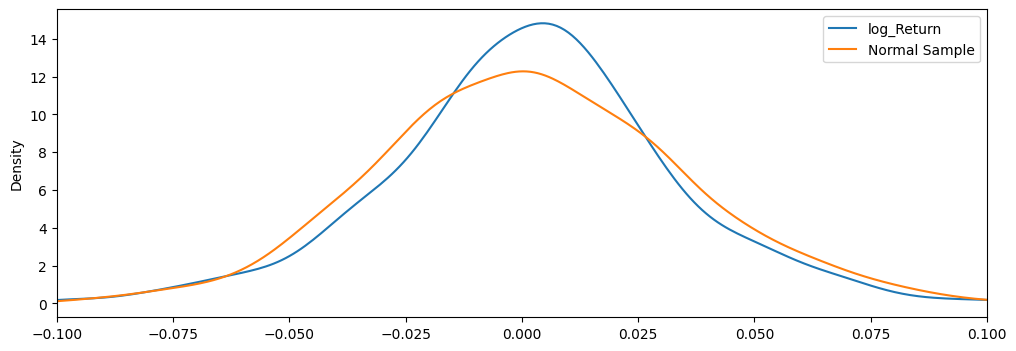

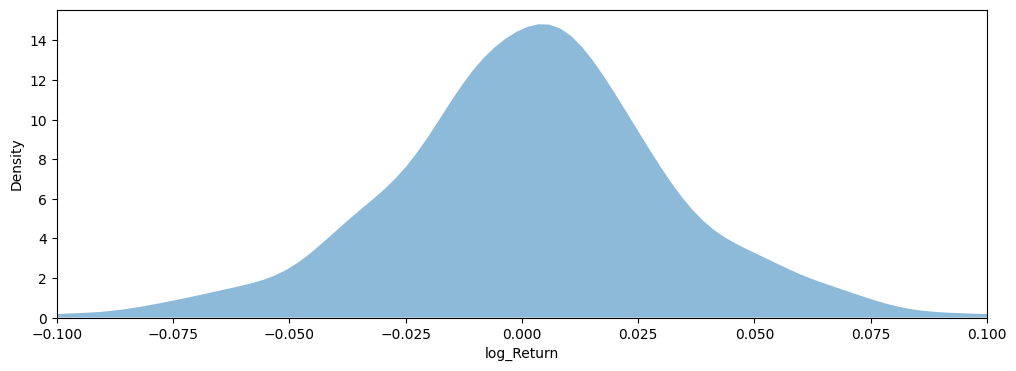

In [59]:
# Sampling from normal distribution
np.random.seed(222)
normal_dist = stats.norm.rvs(
    size=len(df["log_Return"]), loc=df["log_Return"].mean(), scale=df["log_Return"].std()
)

# Creating an additional column in df in order to use the KDE plot functionality of pandas
df["Normal Sample"] = normal_dist

# Plotting the KDE plots
df[["log_Return", "Normal Sample"]].plot(kind="kde", xlim=(-0.1, 0.1), figsize=(12, 4))

#Using Seaborn to create KDE
plt.figure(figsize = (12,4))
kde = sns.kdeplot(df["log_Return"], fill=True, alpha=.5, linewidth=0).set_xlim(-0.1, 0.1);

The NVDA returns seem a lot more leptokurtic. Indeed the excess kurtosis of NVDA is greater than 0:


In [60]:
df_stats.kurt()

4.065434959198714

The tails of NDA are also fatter than those of a normal distribution:

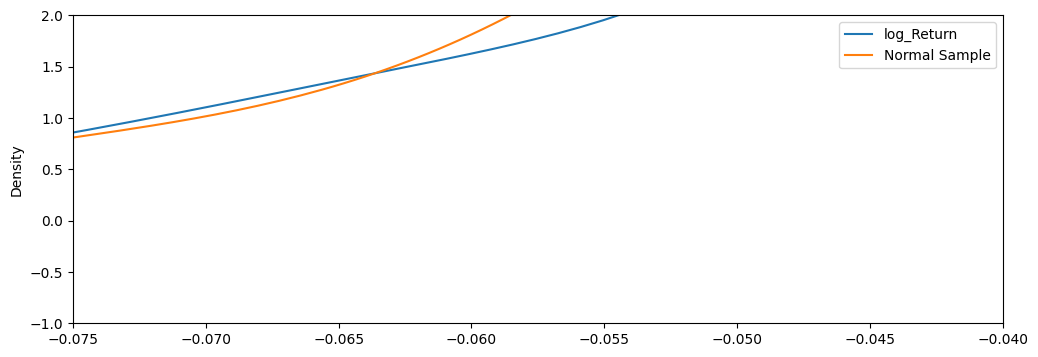

In [61]:
# Observing the tails
df[["log_Return", "Normal Sample"]].plot(
    kind="kde", xlim=(-0.075, -0.04), ylim=(-1, 2), figsize=(12, 4)
);

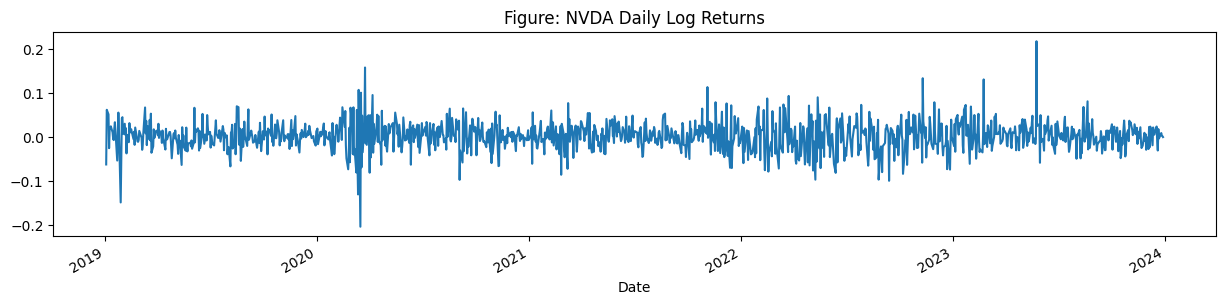

In [62]:
ax1 = df_stats.plot(figsize=(15, 3), y="NVDA", title="Figure: NVDA Daily Log Returns")

Daily Log Return graph

In [63]:
nvda_std = df_stats.std()
nvda_mean = df_stats.mean()

In [64]:
# Sharpe Ratio
Sharpe_Ratio_NVDA = nvda_mean / nvda_std
Sharpe_Ratio_NVDA

0.0658230358265171

The calculated Sharpe Ratio for the given data (NVDA) is approximately 0.0658. This ratio represents the risk-adjusted return, and in this case, a Sharpe Ratio of 0.0658 indicates the excess return per unit of risk for the NVDA investment.

In [65]:
# Semi-Variance
nvda_semivariance = ((df[df_stats < nvda_mean]["log_Return"] - nvda_mean) ** 2).mean()
nvda_semivariance

0.0010849318071340169

The calculated semi-variance for the NVDA log returns data is approximately 0.00108. This semi-variance is a measure of the average squared deviation of returns below the mean, providing insight into the downside risk associated with the NVDA investment.

### Relationship Analysis

In [66]:
# Create a new DataFrame with relevant columns for correlation analysis
correlation_df = df[['Adj Close_x', 'Volume', 'log_Return', 'VIX index']]


In [67]:
# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()
correlation_matrix

,Adj Close_x,Volume,log_Return,VIX index
Adj Close_x,1.000000,-0.000330,0.019155,-0.224991
Volume,-0.000330,1.000000,0.043212,0.283252
log_Return,0.019155,0.043212,1.000000,-0.105276
VIX index,-0.224991,0.283252,-0.105276,1.000000


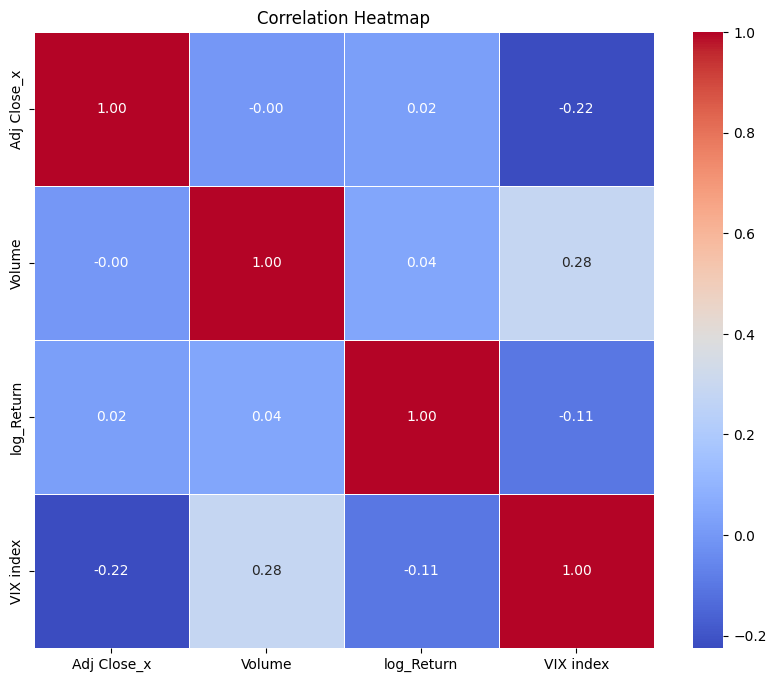

In [68]:
# Plot Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Correlation between columns Adj Close_x, Volume, VIX Index, Log Return

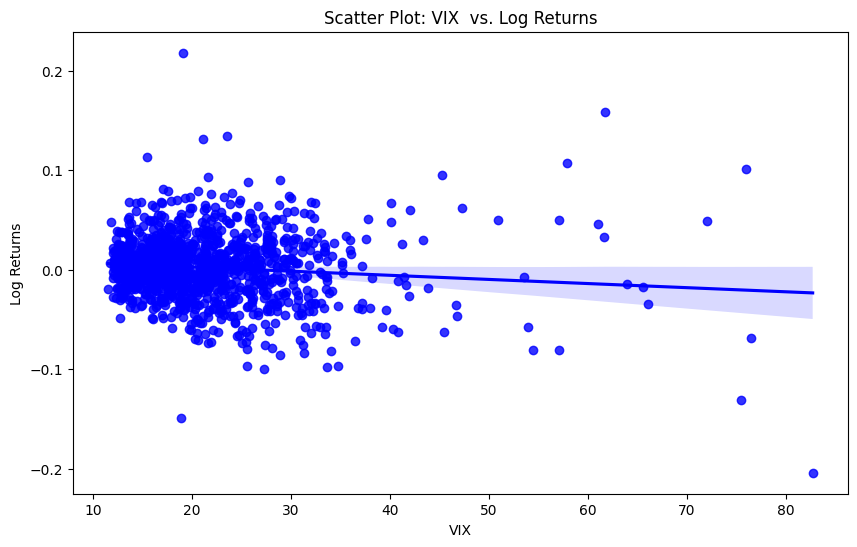

In [69]:
# Scatter Plot: Relationship between Trading Volume and Stock Returns
plt.figure(figsize=(10, 6))
sns.regplot(x='VIX index', y='log_Return', data=df, color='blue')
plt.title('Scatter Plot: VIX  vs. Log Returns')
plt.xlabel('VIX')
plt.ylabel('Log Returns')
plt.show()

In the above Correlation matrix Heatmap we have seen an negative realtionship between VIX return and Log retruns and we can confirm the same in the regplot below as we can the regression line slopping downwards and it concludes that volatitly in market has a slightly negative coorealtion with (NVDA) retruns.

### Liquidity Analysis

In [70]:
# Volume data
nvda_volume = df['Volume']
nvda_bid_ask_spread = df['High'] - df['Low']

In [71]:
# Calculating average daily trading volume and average bid-ask spread
average_daily_volume = nvda_volume.mean()
average_bid_ask_spread = nvda_bid_ask_spread.mean()


In [72]:
# Printing average daily volume and bid-ask spread
print(f"Average Daily Volume: {average_daily_volume:.2f}")
print(f"Average Bid-Ask Spread: {average_bid_ask_spread:.4f}")

Average Daily Volume: 46262513.43
Average Bid-Ask Spread: 6.6491


An average daily trading volume of 46,262,513.43 shares, suggesting a notable level of market activity. Additionally, the average bid-ask spread of 6.6491 indicates a moderate level of liquidity.

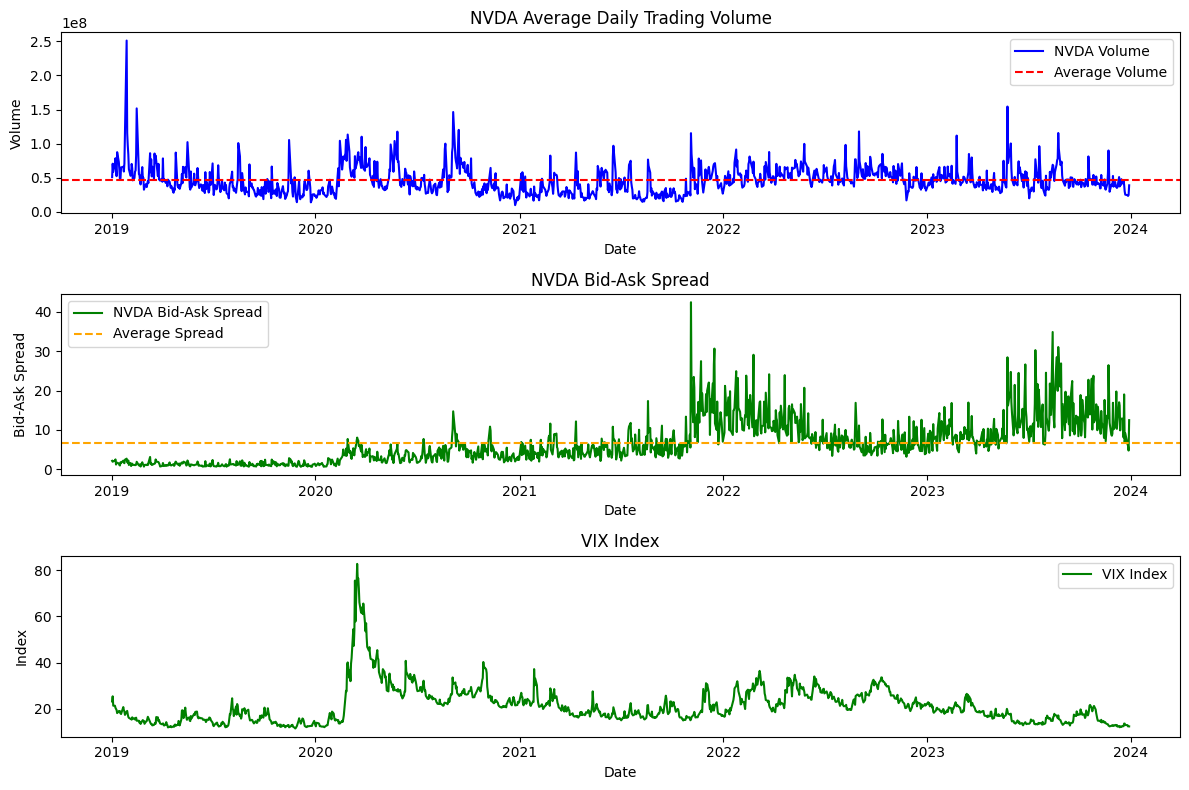

In [73]:
# Plotting average daily volume and bid-ask spread
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))

# Plotting average daily volume
ax1.plot(nvda_volume, label="NVDA Volume", color='blue')
ax1.axhline(average_daily_volume, color='red', linestyle='--', label='Average Volume')
ax1.set_title("NVDA Average Daily Trading Volume")
ax1.set_xlabel("Date")
ax1.set_ylabel("Volume")
ax1.legend()

# Plotting bid-ask spread
ax2.plot(nvda_bid_ask_spread, label="NVDA Bid-Ask Spread", color='green')
ax2.axhline(average_bid_ask_spread, color='orange', linestyle='--', label='Average Spread')
ax2.set_title("NVDA Bid-Ask Spread")
ax2.set_xlabel("Date")
ax2.set_ylabel("Bid-Ask Spread")
ax2.legend()

# Plotting VIX index
ax3.plot(df["VIX index"], label="VIX Index", color='green')
ax3.set_title("VIX Index")
ax3.set_xlabel("Date")
ax3.set_ylabel("Index")
ax3.legend()

plt.tight_layout()
plt.show()

This visualizations offer a comprehensive overview of NVDA's trading dynamics, bid-ask spread variations, and the broader market volatility captured by the VIX Index. (All the key Insights is Completely explained in Project Doc Step 6)

# Publicly traded bond (e.g. treasury bond, corporate bond) – that is, securities lending of a bond.

## U.S. 30 Year Treasury Bond 5 years data

In [74]:
#Importing the data Locally
df_bond=pd.read_csv(r"Data\United States 30-Year Bond Yield Historical Data.csv")
df_bond['Date'] = pd.to_datetime(df_bond['Date'])

In [75]:
#Viewing the data
df_bond.head()

,Date,Price,Open,High,Low,Change %
0,2023-12-29,4.019,3.994,4.048,3.985,0.58%
1,2023-12-28,3.996,3.957,4.002,3.943,1.27%
2,2023-12-27,3.946,4.048,4.052,3.940,-2.49%
3,2023-12-26,4.047,4.055,4.060,4.025,-0.23%
4,2023-12-25,4.056,4.056,4.056,4.056,0.06%


In [76]:
#stats Summary of our data
df_bond.describe()

,Price,Open,High,Low
count,1299.000000,1299.000000,1299.000000,1299.000000
mean,2.683423,2.683516,2.724367,2.642987
std,0.963028,0.963733,0.967699,0.960457
min,1.031000,0.989000,1.088000,0.702000
25%,1.951000,1.947500,1.980000,1.915000
50%,2.362000,2.363000,2.395000,2.328000
75%,3.551500,3.557500,3.605500,3.499000
max,5.109000,5.122000,5.179000,5.046000


In [77]:
# Importing Intrest Rate data and Renaming Date columns and conveting it into Dataframe
df_fund=pd.read_csv(r"Data\RIFSPFFNB.csv")
df_fund['DATE'] = pd.to_datetime(df_fund['DATE'])
df_fund.rename(columns={'DATE': 'Date'}, inplace=True)
df_fund.head()

,Date,RIFSPFFNB
0,2019-01-02,2.40
1,2019-01-03,2.40
2,2019-01-04,2.40
3,2019-01-07,2.40
4,2019-01-08,2.40


In [78]:
df_bond.head()

,Date,Price,Open,High,Low,Change %
0,2023-12-29,4.019,3.994,4.048,3.985,0.58%
1,2023-12-28,3.996,3.957,4.002,3.943,1.27%
2,2023-12-27,3.946,4.048,4.052,3.940,-2.49%
3,2023-12-26,4.047,4.055,4.060,4.025,-0.23%
4,2023-12-25,4.056,4.056,4.056,4.056,0.06%


In [79]:
df_fund = df_fund[df_fund["RIFSPFFNB"] != "."]

In [80]:
df_fund['RIFSPFFNB'] = pd.to_numeric(df_fund['RIFSPFFNB'])

In [81]:
# Stats Summary of Fed rates data
df_fund.describe()

,RIFSPFFNB
count,1255.000000
mean,1.852382
std,1.899374
min,0.040000
25%,0.090000
50%,1.550000
75%,3.080000
max,5.330000


### Time Series Analysis

In [82]:
df_bond.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')

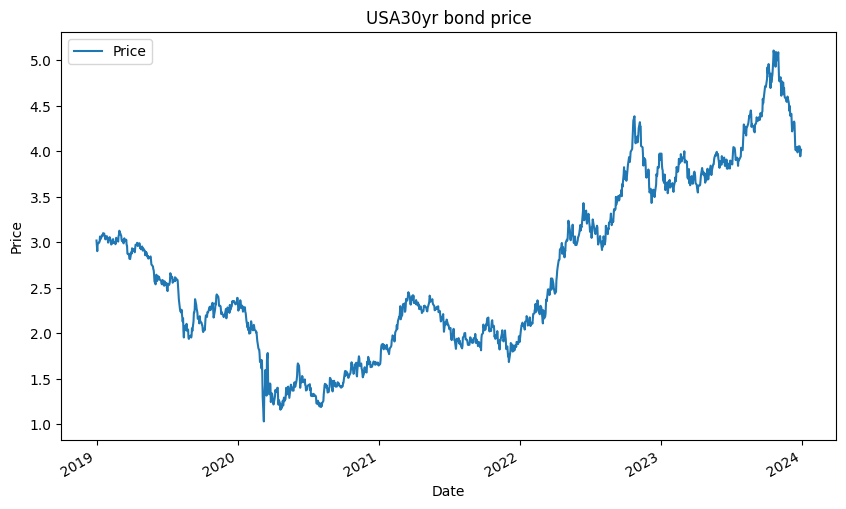

In [83]:
#Plotting the time series data
df_bond.plot(x='Date', y='Price', title="USA30yr bond price", xlabel='Date', ylabel='Price', figsize=(10, 6))
plt.show()

Time Series data from 2019-2023 of US 30 yr Govt Treasury Bond

In [84]:
df_fund.columns

Index(['Date', 'RIFSPFFNB'], dtype='object')

In [85]:
df_fund.head()

,Date,RIFSPFFNB
0,2019-01-02,2.4
1,2019-01-03,2.4
2,2019-01-04,2.4
3,2019-01-07,2.4
4,2019-01-08,2.4


In [86]:
df_fund['Date']

0      2019-01-02
1      2019-01-03
2      2019-01-04
3      2019-01-07
4      2019-01-08
          ...    
1296   2023-12-21
1297   2023-12-22
1299   2023-12-26
1300   2023-12-27
1301   2023-12-28
Name: Date, Length: 1255, dtype: datetime64[ns]

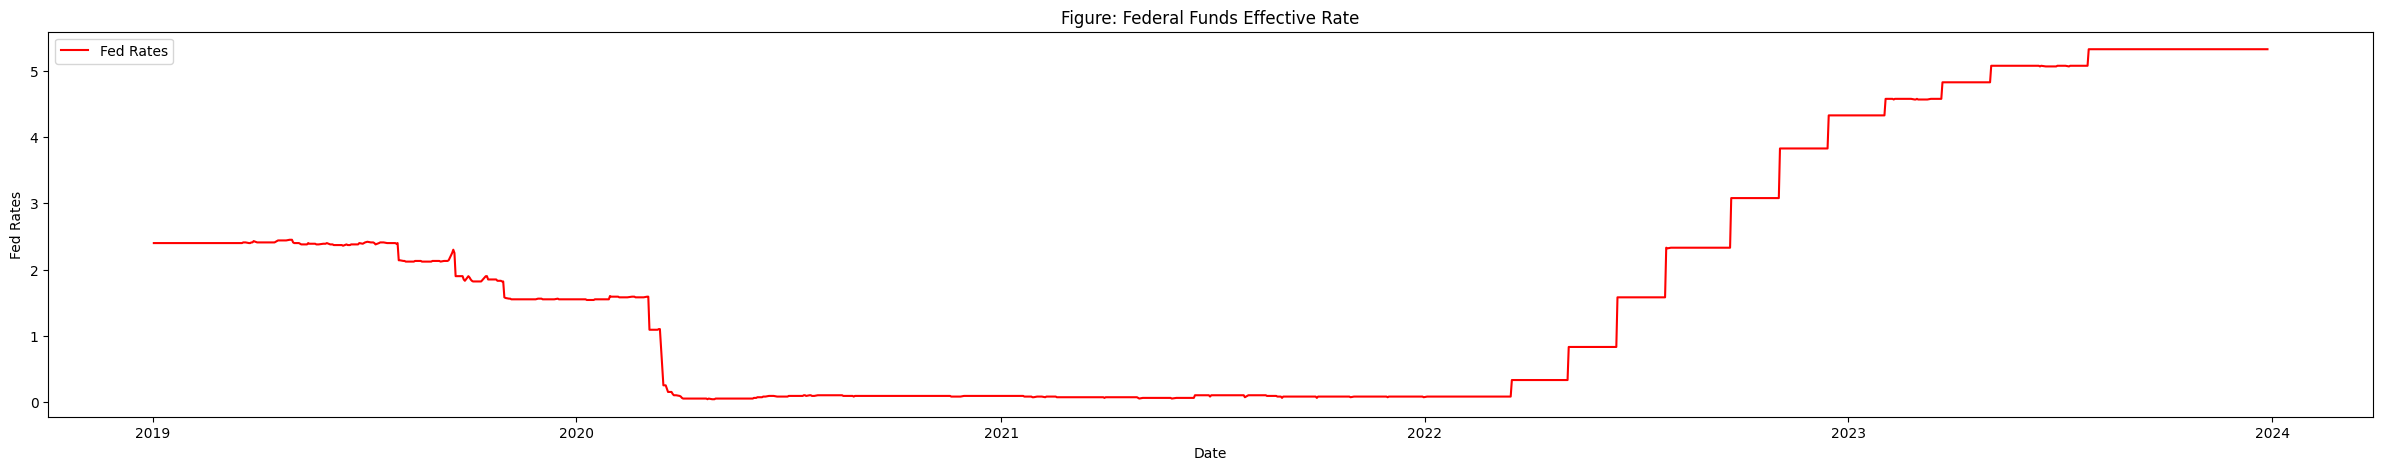

In [87]:
# Plotting Fed Rate Data
fig, ax1 = plt.subplots(figsize=(30, 5))
ax1.plot(df_fund['Date'], df_fund['RIFSPFFNB'], label='Fed Rates', color='Red')
ax1.set_title("Figure: Federal Funds Effective Rate")
ax1.set_xlabel("Date")
ax1.set_ylabel("Fed Rates")
ax1.legend()

plt.show()

Federal effective rate from year 2019-2023

In [88]:
# Importing Plotply for Plotting
import plotly.graph_objects as go
from datetime import datetime

In [89]:
# Plotting Bond price data in candlestick pattern
fig = go.Figure(data=[go.Candlestick(x=df_bond['Date'],
                open=df_bond['Open'],
                high=df_bond['High'],
                low=df_bond['Low'],
                close=df_bond['Price'])])

fig.show()

### Distribution analysis

In [90]:
#Log returns
df_bond['log_Return'] = np.log(df_bond['Price']) - np.log(df_bond['Price'].shift(1))

In [91]:
Max1 = df_bond["log_Return"].max()
Min1 = df_bond["log_Return"].min()
Max2 = (df_bond["log_Return"].min() - df_bond["log_Return"].mean()) / df_bond["log_Return"].std()
Min2 = (df_bond["log_Return"].max() - df_bond["log_Return"].mean()) / df_bond["log_Return"].std()
print("Over the last 5 years, USD30 Yr Bond has had a maximum daily return of %.2f and a minimum daily return of %.2f If we use the formula to determine standard deviations from the mean, we get %.2f and %.2f standard deviations away from the mean for the minimum and maximum, respectively"%(Max1, Min1, Max2, Min2))

Over the last 5 years, USD30 Yr Bond has had a maximum daily return of 0.23 and a minimum daily return of -0.26 If we use the formula to determine standard deviations from the mean, we get -9.63 and 8.51 standard deviations away from the mean for the minimum and maximum, respectively


In [92]:
df_bond.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %', 'log_Return'], dtype='object')

In [93]:
df_bond.log_Return

0            NaN
1      -0.005739
2      -0.012591
3       0.025273
4       0.002221
          ...   
1294   -0.003669
1295   -0.004017
1296   -0.026514
1297    0.020458
1298    0.019055
Name: log_Return, Length: 1299, dtype: float64

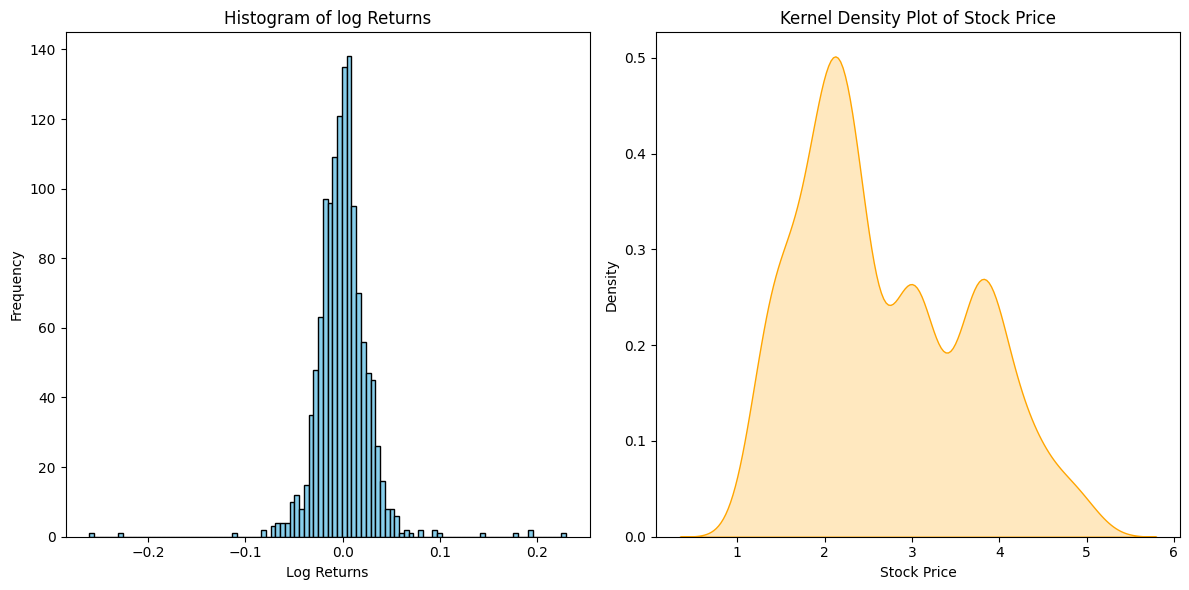

In [94]:
# Plot Histogram of Daily Returns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_bond['log_Return'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')

# Plot Kernel Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df_bond['Price'], fill=True, color='orange')
plt.title('Kernel Density Plot of Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

Here we can see the log returns of Bond price in a normal distribution, we will learn more about the distribution in further section. Also with that we have kernel density plot of Bond price where we can see the price is more dence between 1-3 price range.

### Statstical analysis

In [95]:
df_bond["log_Return"].describe()

count    1298.000000
mean       -0.000220
std         0.026997
min        -0.260315
25%        -0.014330
50%        -0.000391
75%         0.012262
max         0.229525
Name: log_Return, dtype: float64

In [96]:
#Symmetric Test
(len(df_bond[df_bond['log_Return'] > df_bond['log_Return'].mean()])) / (len(df_bond))

0.49653579676674364

We're getting about 49.6% of data points being greater than the mean, which shows we have a slightly Positive skew to this dataset. We can't rule out symmetric returns based on this since it is only a sample of data and is reasonably close to the 50% mark. This makes it hard to say for certain whether bond returns are symmetric or not, but it is still a reasonable assumption to make here.

In [97]:
  ##Normality Test
stats.normaltest(np.array(df_bond["log_Return"].dropna()))

NormaltestResult(statistic=341.42931437914433, pvalue=7.237130477753115e-75)

We can use the normaltest() method here to determine if the sample data could fit a normal distribution. This method uses D'Agostino and Pearson's normality test, which combines skew and kurtosis to produce an omnibus test of normality.

The null hypothesis of this test is that the sample data fits a normal distribution. Let's assume we want to be 90% confident this data fits a normal distribution. We can compare this to the p-value to see if it's greater than 90%. In this case, the value, 7.23e-75, is extremely small, which leads us to reject the null hypothesis that this data fits a normal distribution.

In [98]:
  ##Skewness and Kurtosis
stats.jarque_bera((np.array(df_bond["log_Return"].dropna())))

SignificanceResult(statistic=21507.884059971573, pvalue=0.0)

The Jarque-Bera test was conducted on the log returns data. The test resulted in a statistic of 21507.884059971573 and an extremely low p-value of 0.0. This indicates strong evidence against the null hypothesis that the data follows a normal distribution. Therefore, the log returns data is found to be significantly non-normally distributed based on the results of the Jarque-Bera test.

In [99]:
df_bond_Max = df_bond['log_Return'].max()
df_bond_Min = df_bond['log_Return'].min()
print(
    "Min return of sample data is %.4f and the maximum return of sample data is %.4f"
    % (df_bond_Min, df_bond_Max)
)

Min return of sample data is -0.2603 and the maximum return of sample data is 0.2295


In [100]:
(df_bond_Min - df_bond['log_Return'].mean()) / df_bond['log_Return'].std()

-9.634345130739318

In [101]:
(df_bond_Max - df_bond['log_Return'].mean()) / df_bond['log_Return'].std()

8.51013899149708

Over the last 5 years, US 30 yr Bond has had a maximum daily return of 23% and a minimum daily return of -26.03%. If we use the formula to determine standard deviations from the mean, we get -9.63 and 8.51 standard deviations away from the mean for the minimum and maximum, respectively. These standard deviations are humongous when compared to the normal distribution. We can see this analytically when we plug in the z score to the norm.cdf() method to determine the probability this value could be in a normal distribution:

In [102]:
stats.norm.cdf(-9.63)

2.986473944424807e-22

This implies that the chance we could have a move as small as -26.03%, is 2.986473944424807e-22. This probability is so low that we would never expect an event like this to happen in our lifetime. We have multiple events like this, as illustrated by the minimum and maximum.

Going further with this idea, based on normal distribution z tables, we would expect 99.7% of our data points to be within +/- 3 standard deviations from the mean. Let's determine this for our sample data. First off, we need to find the cut-off values at +/- 3 standard deviations:

In [103]:
(3 * df_bond['log_Return'].std()) + df_bond['log_Return'].mean()

0.08076965051448466

In [104]:
(-3 * df_bond['log_Return'].std()) + df_bond['log_Return'].mean()

-0.08120998377192733


The above two calculations would imply that 99.7% of all of our data points should be in between -0.0807 and 0.0812.

In [105]:
df_bond[(df_bond['log_Return'] > 0.03699) | (df_bond['log_Return'] < -0.0364)]['log_Return'].tail()

1132    0.037283
1137   -0.045030
1139    0.068366
1141    0.059740
1146    0.048285
Name: log_Return, dtype: float64

In [106]:
len(df_bond[(df_bond['log_Return'] > 0.03699) | (df_bond['log_Return'] < -0.0364)])

122

In [107]:
len(df_bond[(df_bond["log_Return"] > 0.05) | (df_bond["log_Return"] < -0.05)])

53

Not only do we get 122 values outside of our 3 standard deviation range, but we also get 53 values outside of +/- 5%, though you would almost never expect one of these events over 5 years, given a normal distribution.

In [108]:
# Sampling from normal distribution
np.random.seed(222)
normal_dist = stats.norm.rvs(
    size=len(df_bond["log_Return"]), loc=df_bond["log_Return"].mean(), scale=df_bond["log_Return"].std()
)

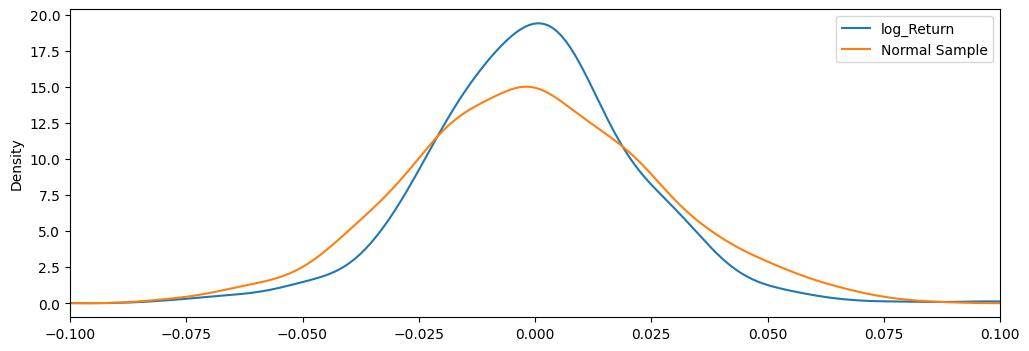

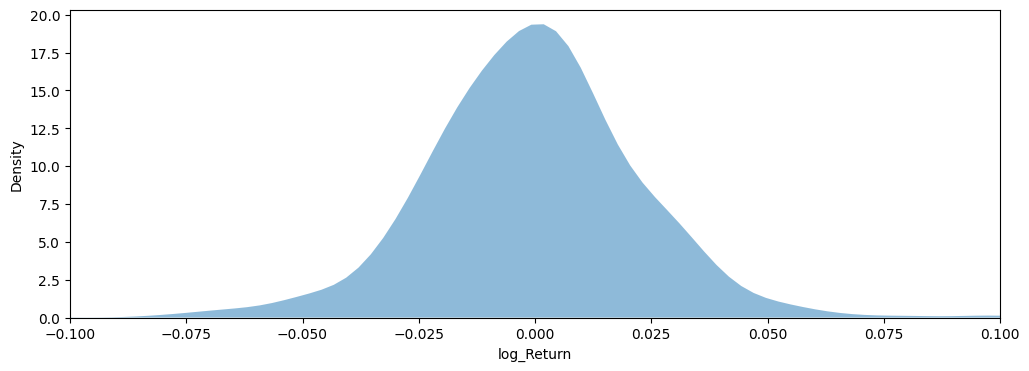

In [109]:
# Creating an additional column in df in order to use the KDE plot functionality of pandas
df_bond["Normal Sample"] = normal_dist

# Plotting the KDE plots
df_bond[["log_Return", "Normal Sample"]].plot(kind="kde", xlim=(-0.1, 0.1), figsize=(12, 4))

#Using Seaborn to create KDE
plt.figure(figsize = (12,4))
kde = sns.kdeplot(df_bond["log_Return"], fill=True, alpha=.5, linewidth=0).set_xlim(-0.1, 0.1);



The Bond returns seem a lot more leptokurtic. Indeed the excess kurtosis of Bond is greater than 0:


In [110]:
df_bond['log_Return'].kurt()

20.019489802123687

The tails of NDA are also fatter than those of a normal distribution:

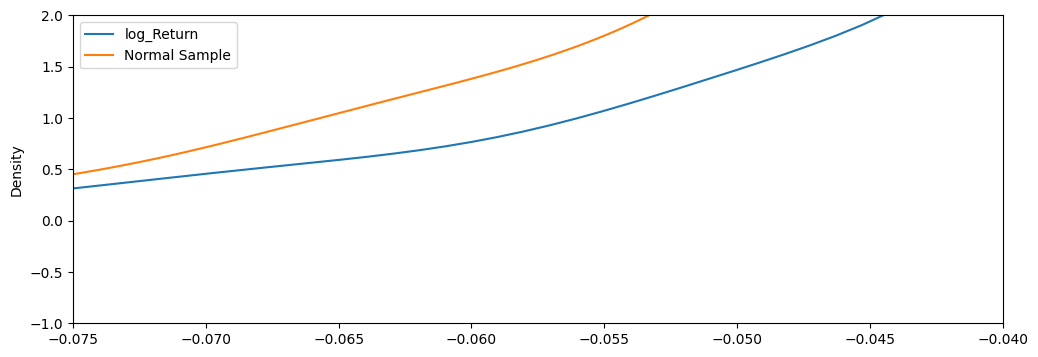

In [111]:
# Observing the tails
df_bond[["log_Return", "Normal Sample"]].plot(
    kind="kde", xlim=(-0.075, -0.04), ylim=(-1, 2), figsize=(12, 4)
);



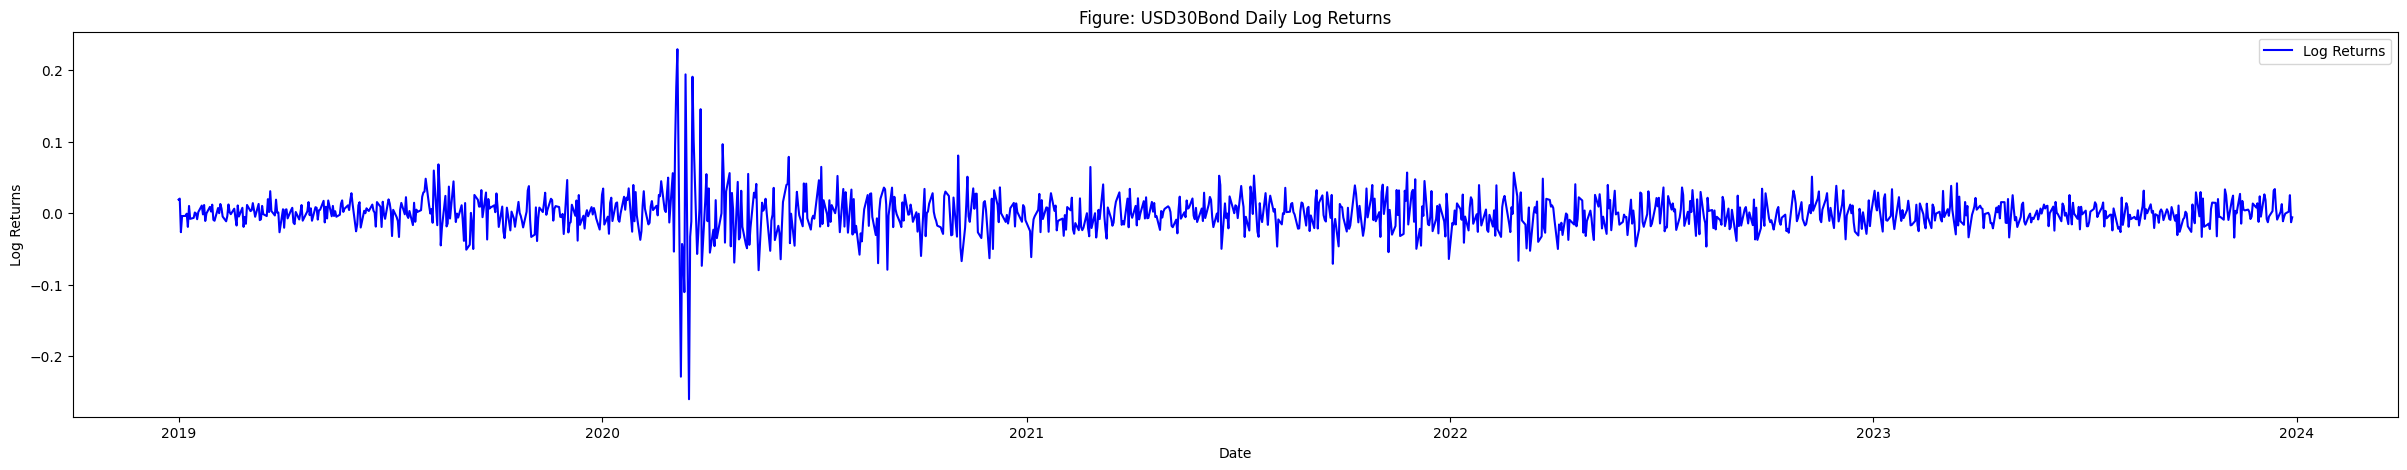

In [112]:
fig, ax1 = plt.subplots(figsize=(30, 5))
ax1.plot(df_bond['Date'], df_bond['log_Return'], label='Log Returns', color='blue')
ax1.set_title("Figure: USD30Bond Daily Log Returns")
ax1.set_xlabel("Date")
ax1.set_ylabel("Log Returns")
ax1.legend()

Daily Log Return graph

In [113]:
usd30_std = df_bond['log_Return'].std()
usd30_mean = df_bond['log_Return'].mean()


In [114]:
# Sharpe Ratio
Sharpe_Ratio_usd30 = usd30_mean / usd30_std
Sharpe_Ratio_usd30

-0.008155344825585843

The calculated Sharpe Ratio for the Bond is approximately -0.0081. This ratio represents the risk-adjusted return, and in this case, a Sharpe Ratio of -0.0081 indicates the less return per unit of risk for the Bond investment.

In [115]:
# Semi-Variance
usd30_semivariance = ((df_bond[df_bond['log_Return'] < usd30_mean]["log_Return"] - usd30_mean) ** 2).mean()
usd30_semivariance

0.0006879129555858797

The calculated semi-variance for the NVDA log returns data is approximately 0.00687. This semi-variance is a measure of the average squared deviation of returns below the mean, providing insight into the downside risk associated with the NVDA investment.

### Liquidity analysis

In [116]:
# Calculating average daily trading volume and average bid-ask spread
usd30_bid_ask_spread = df_bond['High'] - df_bond['Low']

In [117]:
# Printing average daily volume and bid-ask spread
average_bid_ask_spread = usd30_bid_ask_spread.mean()
print(f"Average Bid-Ask Spread: {average_bid_ask_spread:.4f}")

Average Bid-Ask Spread: 0.0814


the average bid-ask spread of 0.0814 indicates a good level of liquidity.

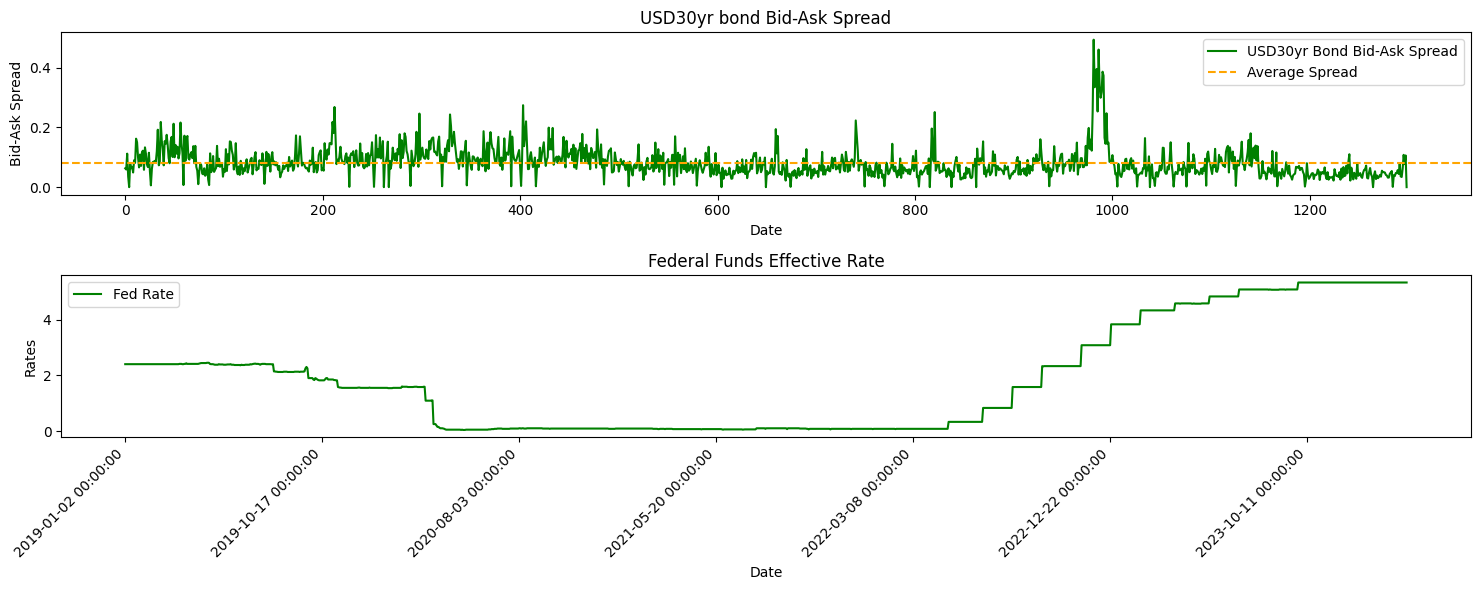

In [118]:
# Plotting average daily volume and bid-ask spread
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))

# Plotting bid-ask spread
ax1.plot(usd30_bid_ask_spread, label="USD30yr Bond Bid-Ask Spread", color='green')
ax1.axhline(average_bid_ask_spread, color='orange', linestyle='--', label='Average Spread')
ax1.set_title("USD30yr bond Bid-Ask Spread")
ax1.set_xlabel("Date")
ax1.set_ylabel("Bid-Ask Spread")
ax1.legend()

date_range_ticks = range(0, len(df_bond), 200)
plt.xticks(date_range_ticks, df_bond["Date"].iloc[date_range_ticks], rotation=45, ha='right')


# Plotting FED Rates index
ax2.plot(df_fund["RIFSPFFNB"], label="Fed Rate", color='green')
ax2.set_title("Federal Funds Effective Rate")
ax2.set_xlabel("Date")
ax2.set_ylabel("Rates")
ax2.legend()

date_range_ticks = range(0, len(df_fund), 200)
plt.xticks(date_range_ticks, df_fund["Date"].iloc[date_range_ticks], rotation=45, ha='right')

plt.tight_layout()
plt.show()

This visualizations offer a comprehensive overview of Bond's trading dynamics, bid-ask spread variations, and the Fed Rates. (All the key Insights is Completely explained in Project Doc Step 6)

# An illiquid security

### MongoDB, Inc.

In [119]:
#To analyze an illiquid security - small-cap stocks I have used 5 years of MongoDB data using yahoo finance as my data source

In [120]:
import datetime
#Reading the data using yahoo Finance
start = datetime.date(2019, 1, 1)
end = datetime.date(2023, 12, 31)
df_mdb = web.DataReader(["MDB"],start,end)
df_VIX = web.DataReader(["^VIX"], start, end)["Adj Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [121]:
#Describe data
df_mdb = df_mdb.merge(df_VIX, on="Date", how="outer")
df_mdb.rename(columns={'Adj Close_x': 'Price MDB', 'Adj Close_y': 'VIX index'}, inplace=True)
df_mdb = df_mdb.iloc[:, 0:7]
df_mdb.describe()

,Open,High,Low,Close,Price MDB,Volume,VIX index
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,268.310529,275.187817,261.609103,268.427977,268.427977,1.326268e+06,21.367917
std,117.055169,119.442969,114.500991,116.827281,116.827281,9.845323e+05,8.238798
min,72.720001,73.910004,70.660004,73.739998,73.739998,2.226000e+05,11.540000
25%,158.797497,162.972496,154.834000,159.895004,159.895004,7.586000e+05,15.960000
50%,243.904999,252.375000,236.779999,244.979996,244.979996,1.117750e+06,19.525001
75%,365.922493,374.664261,357.976250,365.437508,365.437508,1.576000e+06,24.799999
max,585.030029,590.000000,566.570007,585.030029,585.030029,1.254210e+07,82.690002


<Axes: title={'center': "MongoDB's stock price"}, xlabel='Date'>

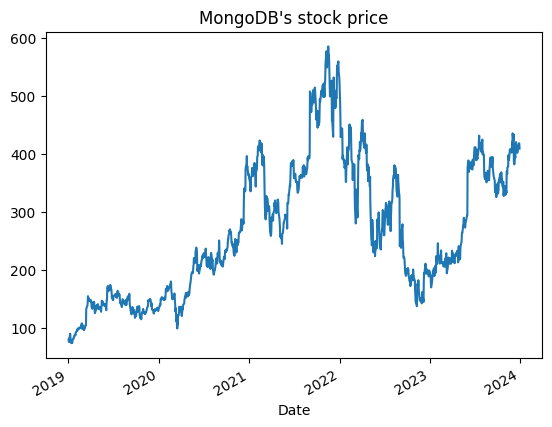

In [122]:
#Charting price
df_mdb["Price MDB"].plot(title="MongoDB's stock price")

Text(0, 0.5, 'Frequency')

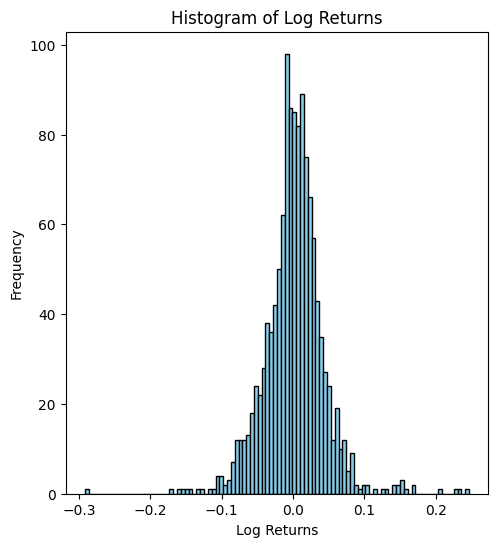

In [123]:
#Caculate log return
df_mdb["Log_Return"] = np.log(df_mdb["Price MDB"])-np.log(df_mdb["Price MDB"].shift(1))
# Plot Histogram of Daily Returns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_mdb['Log_Return'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')

In [124]:
#Describe Log-Return of MongoDB
df_mdb["Log_Return"].describe()

count    1257.000000
mean        0.001298
std         0.042501
min        -0.291965
25%        -0.019930
50%         0.002146
75%         0.023005
max         0.246943
Name: Log_Return, dtype: float64

In [125]:
#Distribution analysis
  ##Normality Test
stats.normaltest(np.array(df_mdb["Log_Return"].dropna()))

NormaltestResult(statistic=165.89349381044596, pvalue=9.477319617865163e-37)

In [126]:
  ##Skewness and Kurtosis
stats.jarque_bera((np.array(df_mdb["Log_Return"].dropna())))

SignificanceResult(statistic=1593.955425492913, pvalue=0.0)

In [127]:
Max1 = df_mdb["Log_Return"].max()
Min1 = df_mdb["Log_Return"].min()
Max2 = (df_mdb["Log_Return"].min() - df_mdb["Log_Return"].mean()) / df_mdb["Log_Return"].std()
Min2 = (df_mdb["Log_Return"].max() - df_mdb["Log_Return"].mean()) / df_mdb["Log_Return"].std()
print("Over the last 5 years, MongoDB has had a maximum daily return of %.2f and a minimum daily return of %.2f If we use the formula to determine standard deviations from the mean, we get %.2f and %.2f standard deviations away from the mean for the minimum and maximum, respectively"%(Max1, Min1, Max2, Min2))

Over the last 5 years, MongoDB has had a maximum daily return of 0.25 and a minimum daily return of -0.29 If we use the formula to determine standard deviations from the mean, we get -6.90 and 5.78 standard deviations away from the mean for the minimum and maximum, respectively


In [128]:
(3 * df_mdb["Log_Return"].std()) + df_mdb["Log_Return"].mean()

0.12880271575567118

In [129]:
(-3 * df_mdb["Log_Return"].std()) + df_mdb["Log_Return"].mean()

-0.12620614144472872

In [130]:
df_mdb[(df_mdb["Log_Return"] > 0.1288) | (df_mdb["Log_Return"] < -0.1262)].tail()

,Open,High,Low,Close,Price MDB,Volume,VIX index,Log_Return
Date,,,,,,,,
2022-06-02,262.000000,290.890015,249.080002,286.700012,286.700012,4986700,24.719999,0.170284
2022-09-01,266.940002,272.000000,238.470001,241.110001,241.110001,8212000,25.559999,-0.291965
2022-11-10,150.009995,165.509995,148.559998,161.000000,161.000000,3714300,23.530001,0.158872
2022-12-07,184.600006,186.750000,167.509995,178.300003,178.300003,12542100,22.680000,0.208874
2023-06-02,380.750000,397.980011,370.000000,376.299988,376.299988,9120700,14.600000,0.246943


In [131]:
len(df_mdb[(df_mdb["Log_Return"] > 0.1288) | (df_mdb["Log_Return"] < -0.1262)])

23

In [132]:
#Correlation Log_Return and Volume
correlation_df = df_mdb[['Price MDB', 'Volume', 'Log_Return', 'VIX index']]
correlation_matrix = correlation_df.corr()
correlation_matrix

,Price MDB,Volume,Log_Return,VIX index
Price MDB,1.000000,-0.144583,0.029989,-0.127921
Volume,-0.144583,1.000000,0.094532,0.018122
Log_Return,0.029989,0.094532,1.000000,-0.079290
VIX index,-0.127921,0.018122,-0.079290,1.000000


In [133]:
MDB_bid_ask_spread = df_mdb['High'] - df_mdb['Low']

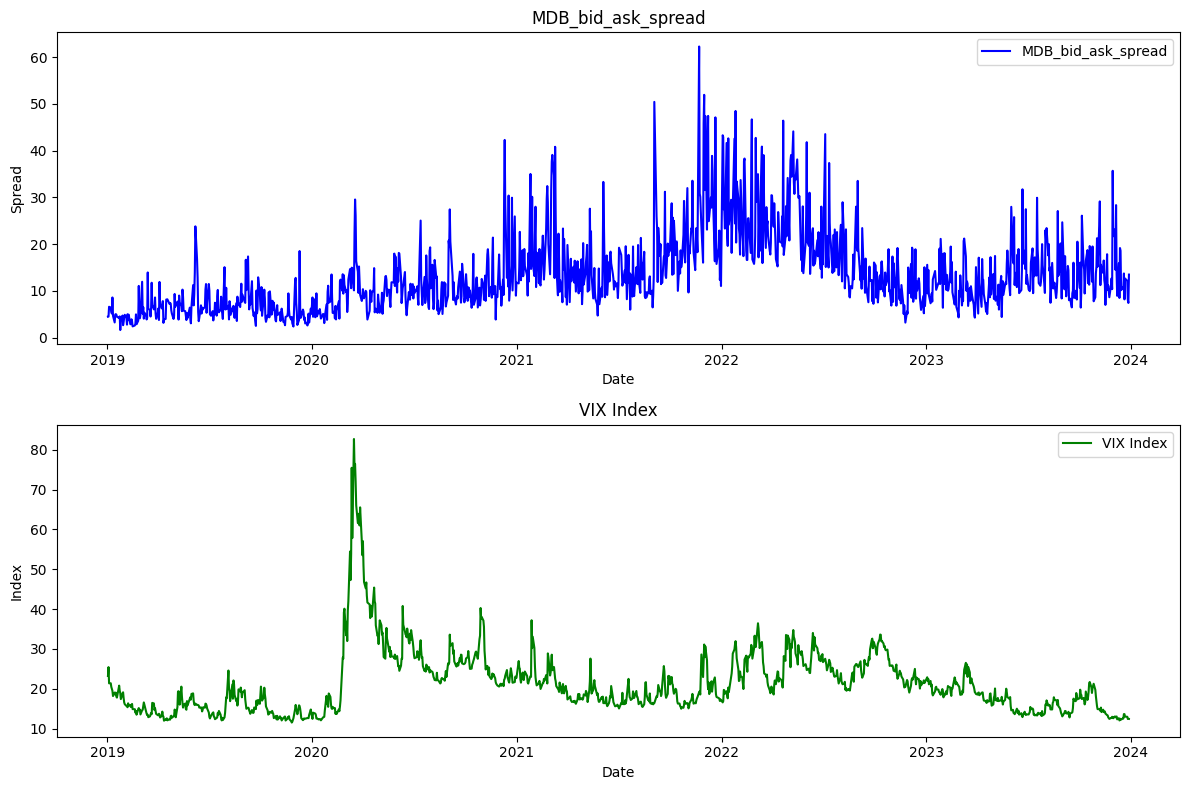

In [134]:
# Plotting bid-ask spread and VIX index
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plotting bid-ask spred
ax1.plot(MDB_bid_ask_spread, label="MDB_bid_ask_spread", color='blue')
ax1.set_title("MDB_bid_ask_spread")
ax1.set_xlabel("Date")
ax1.set_ylabel("Spread")
ax1.legend()

# Plotting bid-ask spread
ax2.plot(df_mdb["VIX index"], label="VIX Index", color='green')
ax2.set_title("VIX Index")
ax2.set_xlabel("Date")
ax2.set_ylabel("Index")
ax2.legend()

plt.tight_layout()
plt.show()